# `IMPORT LIBRARIES`

---





In [1]:
import numpy as np
import math
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
from google.colab import autoviz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# `IMPORT DATA`

---

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/data/loan_data_2007_2014.csv', index_col=0)

<ipython-input-3-0fe4a84c4e38>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/data/loan_data_2007_2014.csv', index_col=0)


#` EXPLORING DATA `

---

In [4]:
data.shape

(466285, 74)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [6]:
catCols = ['home_ownership'
                ,'pymnt_plan'
                ,'verification_status'
                ,'next_pymnt_d'
                ,'addr_state'
                ,'earliest_cr_line'
                ,'title'
                ,'application_type'
                ,'last_pymnt_d'
                ,'emp_length_int'
                ,'issue_d'
                ,'emp'
                ,'title'
                ,'term'
                ,'purpose'
                ,'last_credit_pull_d'
                ,'initial_list_status'
                ,'grade'
                ,'loan_status'
                ,'bad_flag']
numCols = ['loan_amnt'
                ,'dti'
                ,'annual_inc'
                ,'delinq_2yrs'
                ,'inq_last_6mths'
                ,'mths_since_last_delinq'
                ,'mths_since_last_record'
                ,'open_acc'
                ,'pub_rec'
                ,'collections_12_mths_ex_med'
                ,'funded_amnt'
                ,'funded_amnt_inv'
                ,'int_rate'
                ,'installment'
                ,'revol_bal'
                ,'out_prncp'
                ,'out_prncp_inv'
                ,'total_pymnt'
                ,'total_pymnt_inv'
                ,'total_rec_prncp'
                ,'total_rec_int'
                ,'total_rec_late_fee'
                ,'recoveries'
                ,'collection_recovery_fee'
                ,'last_pymnt_amnt'
                ,'revol_util'
                ,'total_acc'
                ,'mths_since_last_major_derog'
                ,'acc_now_delinq'
                ,'tot_coll_amt'
                ,'tot_cur_bal'
                ,'total_rev_hi_lim']

In [7]:
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   
2          n  https://www.lendingclub.com/browse/loanDetail....   
3          n  https://www.lendingclub.com/browse/loanDetail....   
4          n  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00        

In [8]:
data.id.nunique()

466285

In [9]:
data.member_id.nunique()

466285

- Dataset ini terdiri dari 466.285 baris dan memiliki 74 kolom.
Diantaranya terdiri dari beberapa tipe data yaitu float64(46), int64(6), object(22).

- Kemudian untuk `kolom id` dan `member_id`semua value unik yang artinya untuk pemodelan nanti tidak dipakai dan kedua kolom ini akan di drop pada tahap selanjutnya.

- Selanjutnya, pembuangan fitur-fitur yang tidak berguna dilakukan. Contohnya seperti fitur yang merupakan id unik, berupa free text, nilainya kosong semua (NULL), dsb.

In [10]:
cols_to_drop = [
    # id unik
    'id'
    , 'member_id'

    # free text
    , 'url'
    , 'desc'

    # beberapa kolom bernilai null semua dan kolom yang tidak berguna untuk pemodelan
    , 'zip_code'
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
    , 'sub_grade'
]

In [11]:
data = data.drop(cols_to_drop, axis=1)

In [12]:
data.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
4       3000         3000           3000.0   60 months     12.69        67.79   

  grade                 emp_title emp_length home_ownership  annual_inc  \
0     B                       NaN  10+ years           RENT     24000.0   
1     C                     Ryder   < 1 year           RENT     30000.0   
2     C                       NaN  10+ years           RENT     12252.0   
3     C       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4     B  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan         purpose  \
0            Verified  Dec-11   Fully Paid          n     credit_card   
1     Source Verified  Dec-11  Charged Off          n             car   
2        Not Verified  Dec-11   Fully Paid          n  small_business   
3     Source Verified  Dec-11   Fully Paid          n           other   
4     Source Verified  Dec-11      Current          n           other   

                  title addr_state    dti  delinq_2yrs earliest_cr_line  \
0              Computer         AZ  27.65          0.0           Jan-85   
1                  bike         GA   1.00          0.0           Apr-99   
2  real estate business         IL   8.72          0.0           Nov-01   
3              personel         CA  20.00          0.0           Feb-96   
4              Personal         OR  17.94          0.0           Jan-96   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0             1.0                     NaN                     NaN       3.0   
1             5.0                     NaN                     NaN       3.0   
2             2.0                     NaN                     NaN       2.0   
3             1.0                    35.0                     NaN      10.0   
4             0.0                    38.0                     NaN      15.0   

   pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      0.0      13648        83.7        9.0                   f        0.0   
1      0.0       1687         9.4        4.0                   f        0.0   
2      0.0       2956        98.5       10.0                   f        0.0   
3      0.0       5598        21.0       37.0                   f        0.0   
4      0.0      27783        53.9       38.0                   f      766.9   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0   5861.071414          5831.78          5000.00   
1            0.0   1008.710000          1008.71           456.46   
2            0.0   3003.653644          3003.65          2400.00   
3            0.0  12226.302210         12226.30         10000.00   
4          766.9   3242.170000          3242.17          2233.10   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         603.65                0.00        0.00                     0.00   
3        2209.33               16.97        0.00                     0.00   
4        1009.07                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0       Jan-15           171.62          NaN             Jan-16   
1       Apr-13           119.66          NaN             Sep-13   
2       Jun-14           649.91          NaN             Jan-16   
3       Jan-15           357.48          NaN             Jan-15   
4       Jan-16    

# `DEFINE TARGET VARIABLE / LABELING`

---



Dalam dataset ini terdapat beberapa data peminjam ada yang bisa membayar dengan tepat, ada yang telat, dan bahkan ada yang gagal bayar.

Maka dalam project ini saya ditugaskan melakukan modeling untuk credit risk prediction dan untuk target,

maka ditetapkan pada variabel `loan_status` karena dalam variabel tersebut terdapat informasi performa masing-masing peminjam terhadap peminjaman/kredit selama ini

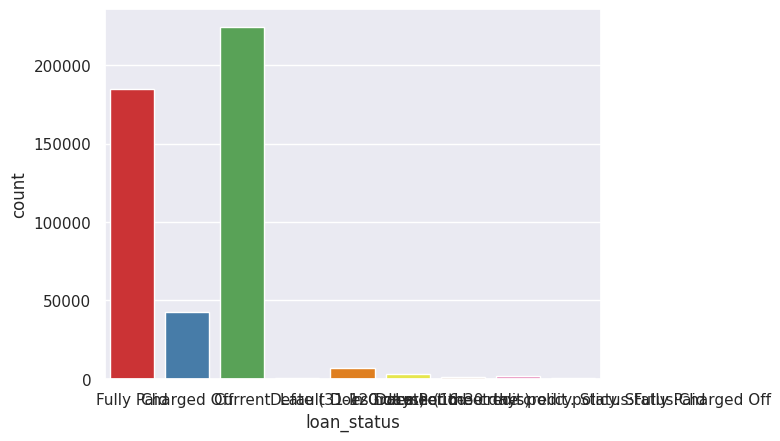

In [13]:
sns.countplot(x ='loan_status', data = data, palette = "Set1")
plt.show()

In [14]:
data.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

Dapat dilihat bahwa variabel `loan_status` memiliki beberapa nilai:
- `Current` artinya pembayaran lancar
- `Charged Off` artinya pembayaran macet sehingga dihapusbukukan
- `Late` artinya pembayaran telat dilakukan
- `In Grace Period` artinya dalam masa tenggang
- `Fully Paid` artinya pembayaran lunas
- `Default` artinya pembayaran macet

Dari definisi-definisi tersebut, masing-masing peminjam bisa dikategorikan sebagai peminjam yang baik dan peminjam yang buruk

Tahap selanjutnya dapat dikatakan peminjam yang buruk adalah peminjam yang telat bayar samopai gagal bayar

In [15]:
bad_status = [
    'Charged Off'
    , 'Default'
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

data['bad_flag'] = np.where(data['loan_status'].isin(bad_status), 1, 0)

In [16]:
data['bad_flag'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: bad_flag, dtype: float64

Setelah dilakukan pemisahan antara peminjam yang baik dan peminjam yang buruk maka terlihat bahwa terjadinya imbalanced data karena data peminjam yang baik sebesar 89 % sedangkan peminjam yang buruk hanya 10 %

In [17]:
data.drop('loan_status', axis=1, inplace=True)

# `DATA CLEANSING, PREPROCESSING, FEATURE ENGINEERING`

---


Pada step ini, dilakukan pembersihan/modifikasi beberapa fitur ke dalam format yang dapat digunakan untuk modeling.

### emp_length

`emp_length` merupakan data setiap peminjam terhadap lamanya mereka bekerja.

Pada tahap ini adalah memodifikasi `emp_length`. Contoh: 4 years menjadi 4

In [18]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [19]:
data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year', str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')

<ipython-input-19-a93402c6aad3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')


In [20]:
data['emp_length_int'] = data['emp_length_int'].astype(float)

In [21]:
data['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [22]:
data.drop('emp_length', axis=1, inplace=True)

### term

`term` disini menunjukan tenor pinjaman

Kolom `term` juga akan disimplifikasi dar 36 months menjadi hanya angka 36

In [23]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [24]:
data['term_int'] = data['term'].str.replace(' months', '')
data['term_int'] = data['term_int'].astype(float)

In [25]:
data.drop('term', axis=1, inplace=True)

### earliest_cr_line

Kolom `earliest_cr_line` merupakan data tanggal dibukanya akun kredit.

Untuk mempermudah tahap selanjutnya maka kolom `earliest_cr_line` akan dimodifikasi dari format bulan-tahun menjadi perhitungan berapa lama waktu berlalu sejak waktu tersebut.

Umumnya digunakan reference date = hari ini. Namun, karena dataset ini merupakan dataset tahun 2007-2014, maka akan lebih relevan jika menggunakan reference date di sekitar tahun 2017. Dalam contoh ini, digunakan tanggal 2017-12-01 sebagai reference date.

In [26]:
data['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

In [27]:
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [28]:
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
data['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [29]:
data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [30]:
data[data['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580           Sep-62            2062-09-01                       -537.0
1770           Sep-68            2068-09-01                       -609.0
2799           Sep-64            2064-09-01                       -561.0

Terlihat ada nilai yang aneh, yaitu negatif.

Nilai negatif muncul karena fungsi Python salah menginterpretasikan tahun 62 menjadi tahun 2062, padahal seharusnya merupakan tahun 1962.

Untuk mengatasi hal ini, sederhananya nilai yang negatif diubah menjadi nilai maximum. Karena di sini nilai-nilai yang negatif artinya adalah data yang sudah tua (tahun 1900an), maka masih masuk akal jika saya mengganti nilai-nilai tersebut menjadi nilai terbesar.

In [31]:
data.loc[data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()

In [32]:
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

### issue_d

`issue_d` kolom yang berisi informasi bulan didanainya pinjaman.

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [33]:
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))

In [34]:
data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [35]:
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

### last_pymnt_d

`last_pymnt_d` merupakan informasi pembayaran terakhir yang diterima

Konsep preprocessing yang dilakukan masih sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [36]:
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [37]:
data['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [38]:
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

### next_pymnt_d

`next_pymnt_d` adalah kolom informasi tentang pembayaran berikutnya

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [39]:
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')
data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [40]:
data['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [41]:
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

### last_credit_pull_d

`last_credit_pull_d` merupakan kolom berisi pengecekan terakhir kredit peminjam

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [42]:
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [43]:
data['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [44]:
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

In [45]:
data.head()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment grade  \
0       5000         5000           4975.0     10.65       162.87     B   
1       2500         2500           2500.0     15.27        59.83     C   
2       2400         2400           2400.0     15.96        84.33     C   
3      10000        10000          10000.0     13.49       339.31     C   
4       3000         3000           3000.0     12.69        67.79     B   

                  emp_title home_ownership  annual_inc verification_status  \
0                       NaN           RENT     24000.0            Verified   
1                     Ryder           RENT     30000.0     Source Verified   
2                       NaN           RENT     12252.0        Not Verified   
3       AIR RESOURCES BOARD           RENT     49200.0     Source Verified   
4  University Medical Group           RENT     80000.0     Source Verified   

  pymnt_plan         purpose                 title addr_state    dti  \
0          n     credit_card              Computer         AZ  27.65   
1          n             car                  bike         GA   1.00   
2          n  small_business  real estate business         IL   8.72   
3          n           other              personel         CA  20.00   
4          n           other              Personal         OR  17.94   

   delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
0          0.0             1.0                     NaN   
1          0.0             5.0                     NaN   
2          0.0             2.0                     NaN   
3          0.0             1.0                    35.0   
4          0.0             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.07                0.00   
1          1008.71           456.46         435.17                0.00   
2          3003.65          2400.00         603.65                0.00   
3         12226.30         10000.00        2209.33               16.97   
4          3242.17          2233.10        1009.07                0.00   

   recoveries  collection_recovery_fee  last_pymnt_amnt  \
0        0.00                     0.00           171.62   
1      117.08                     1.11           119.66   
2        0.00                     0.00           649.91   
3        0.00                     0.00           357.48   
4        0.00                     0.00            67.79   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                         0.0                          NaN            1   
1                         0.0                          NaN            1   
2                         0.0                          NaN            1   
3                         0.0                          NaN            1   
4                         0.0                          NaN            1   

  application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0       INDIVIDUAL             0.0           NaN          NaN   
1       INDIVIDUAL             0.0  

# `EXPLORATORY DATA ANALYSIS`

---




### Correlation Check

### Uni-variate Analysis
Individual Boxplot and Violinplot

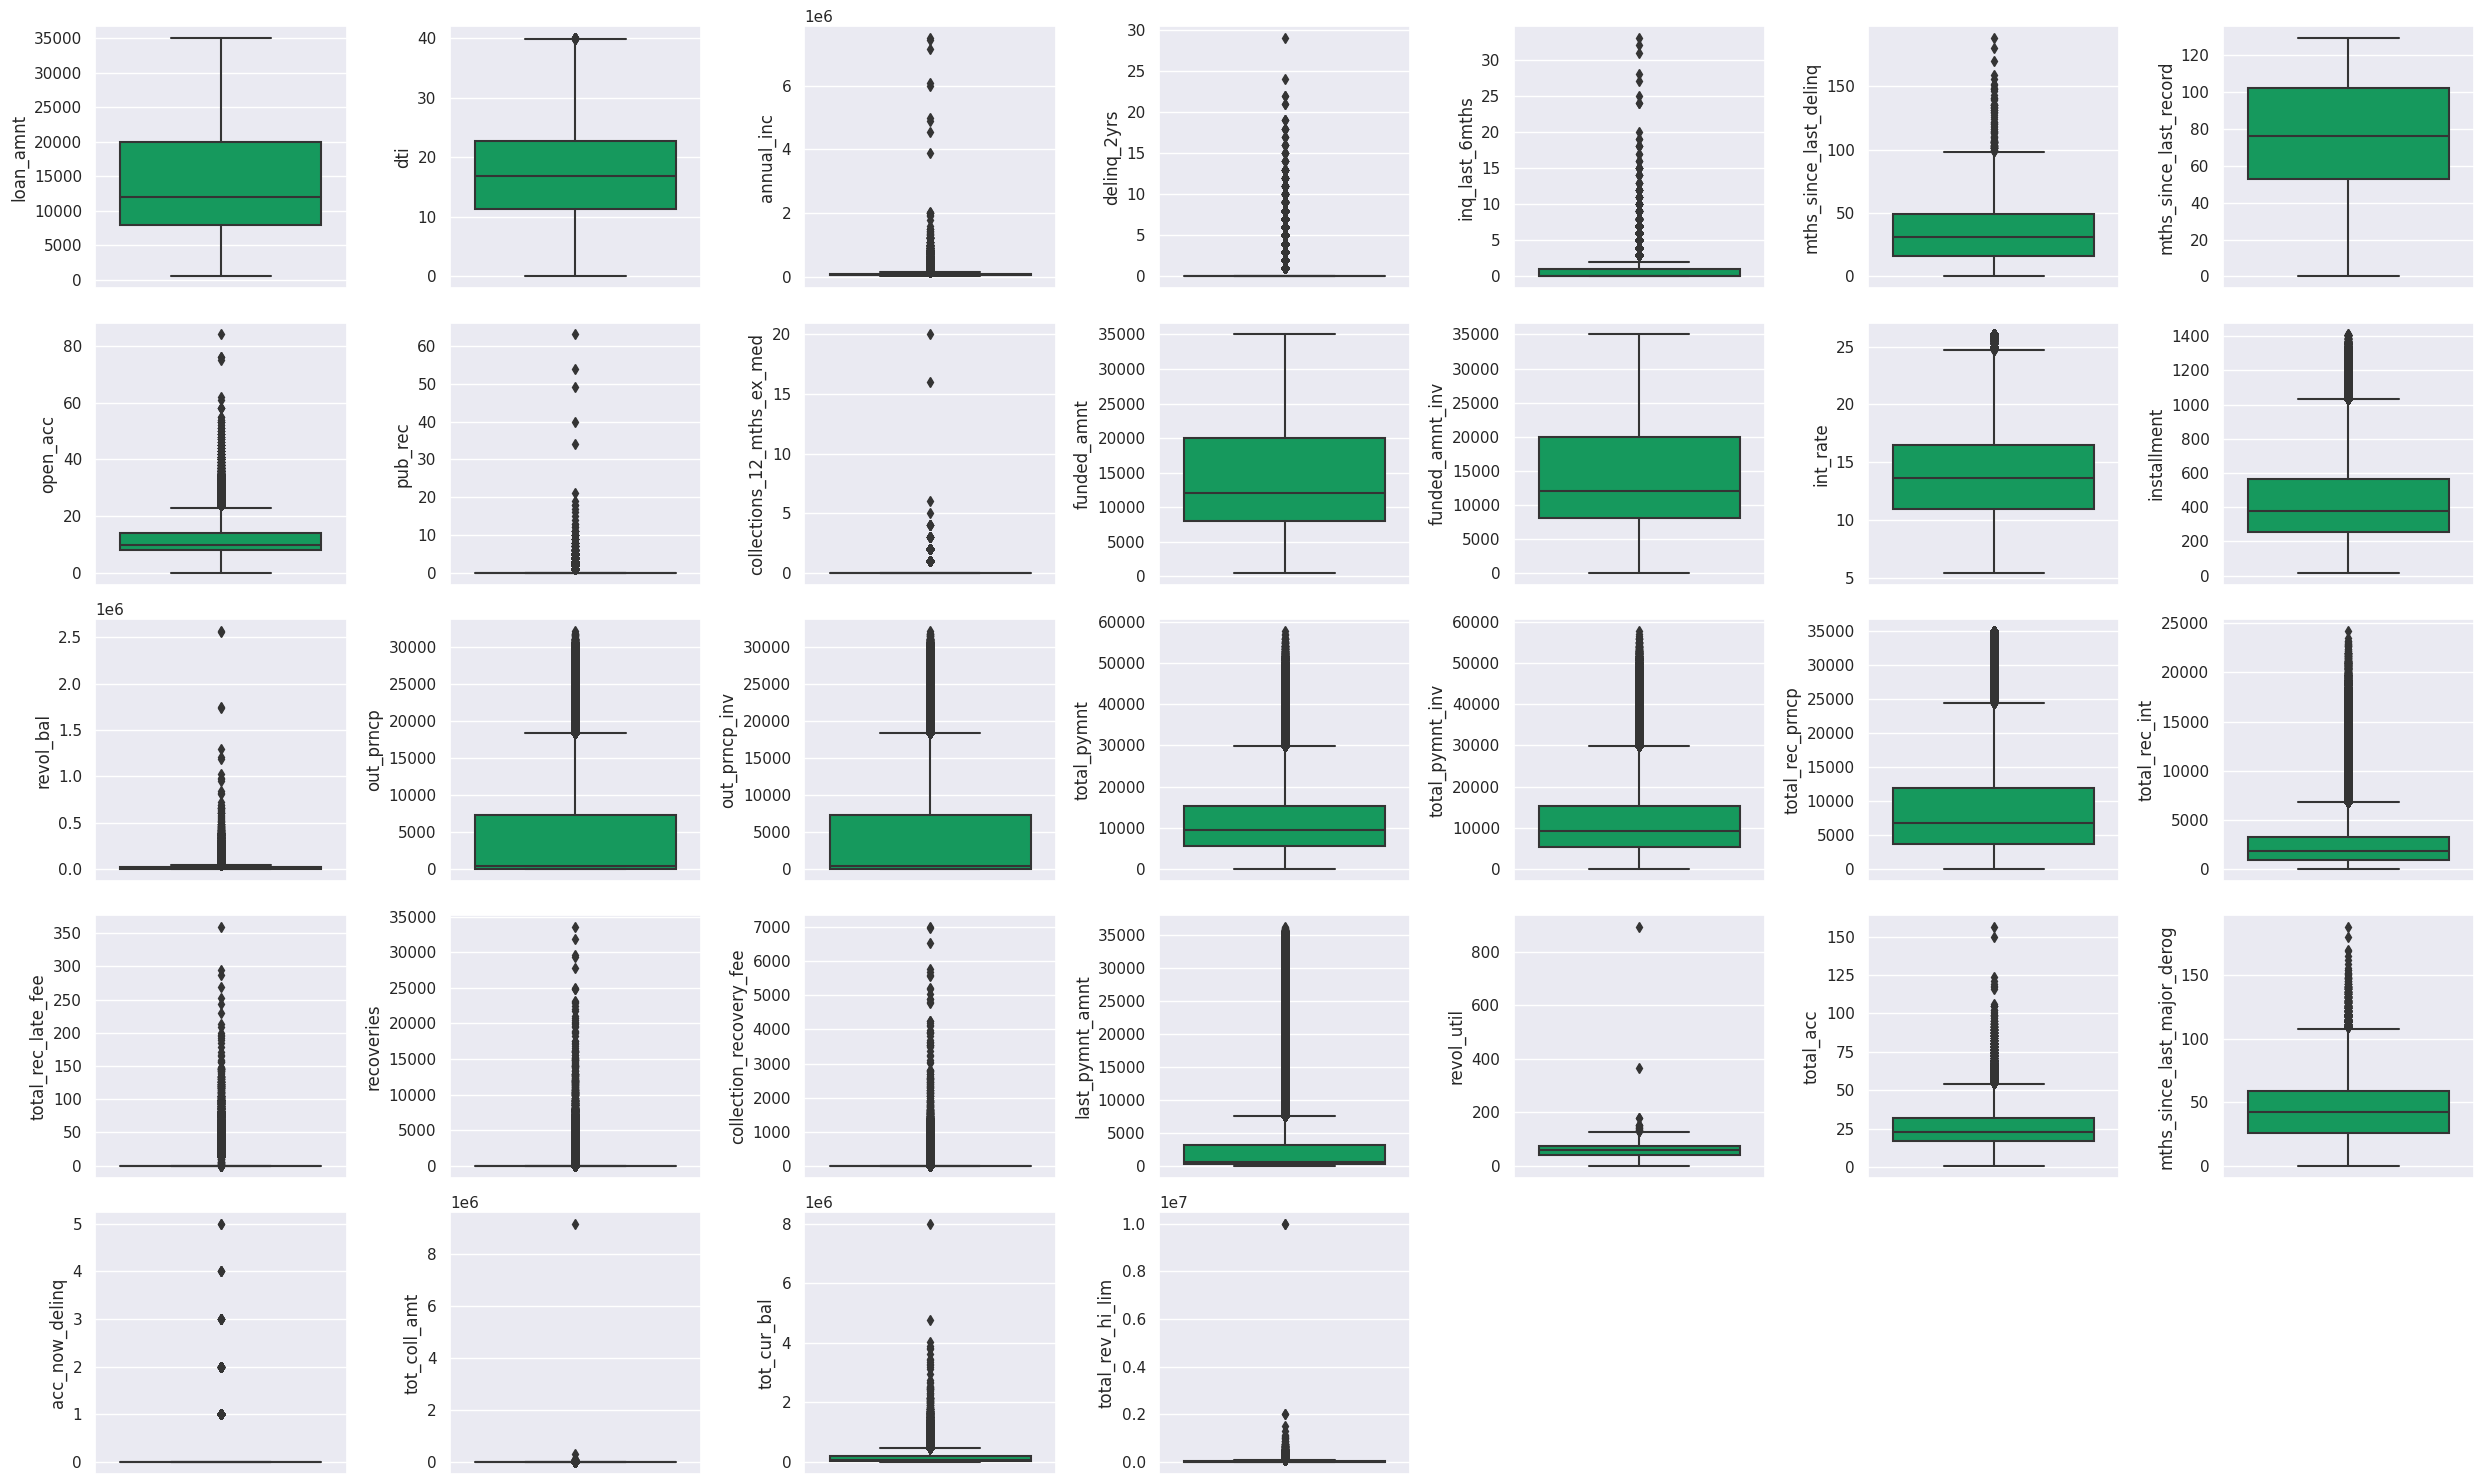

In [46]:
plt.figure(figsize=(25, 15))
n = 5
for i in range(0, len(numCols)):
    plt.subplot(n, math.ceil(len(numCols)/n), i+1)
    sns.boxplot(y=data[numCols[i]], color='#00af5f', orient='v')
    plt.tight_layout()

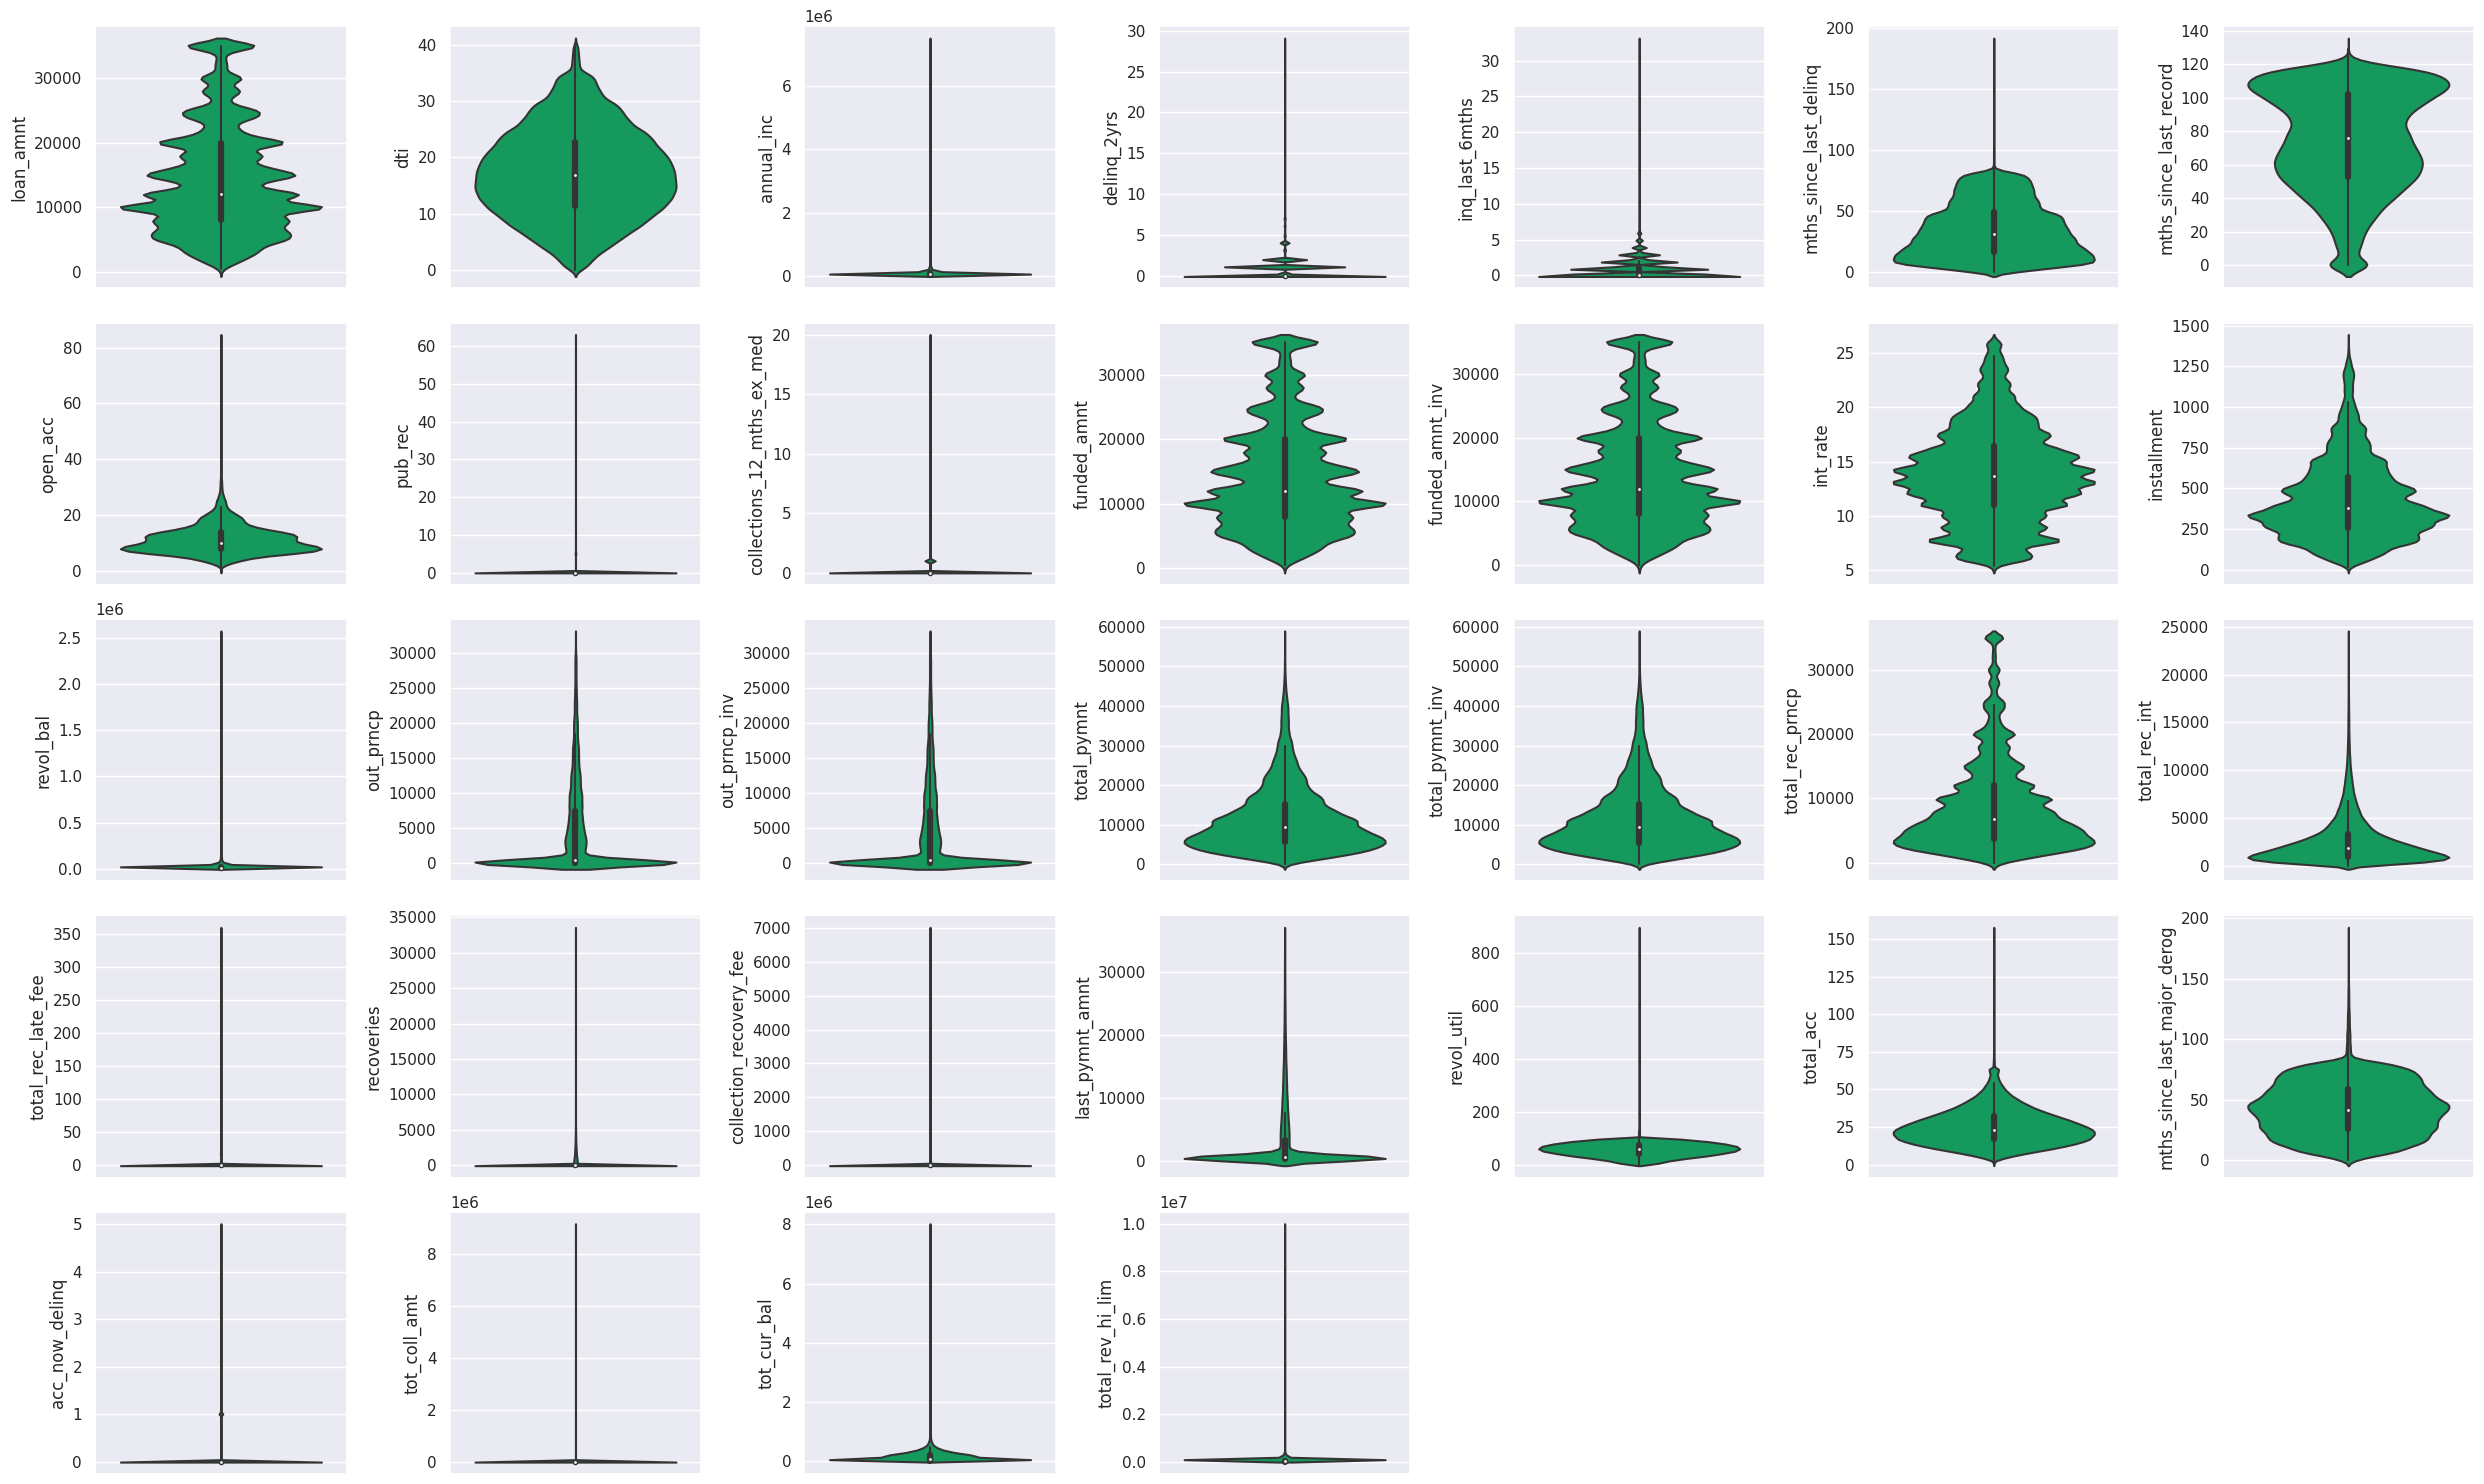

In [47]:
plt.figure(figsize=(25, 15))
n = 5
for i in range(0, len(numCols)):
    plt.subplot(n, math.ceil(len(numCols)/n), i+1)
    sns.violinplot(y=data[numCols[i]], color='#00af5f',orient='v')
    plt.tight_layout()

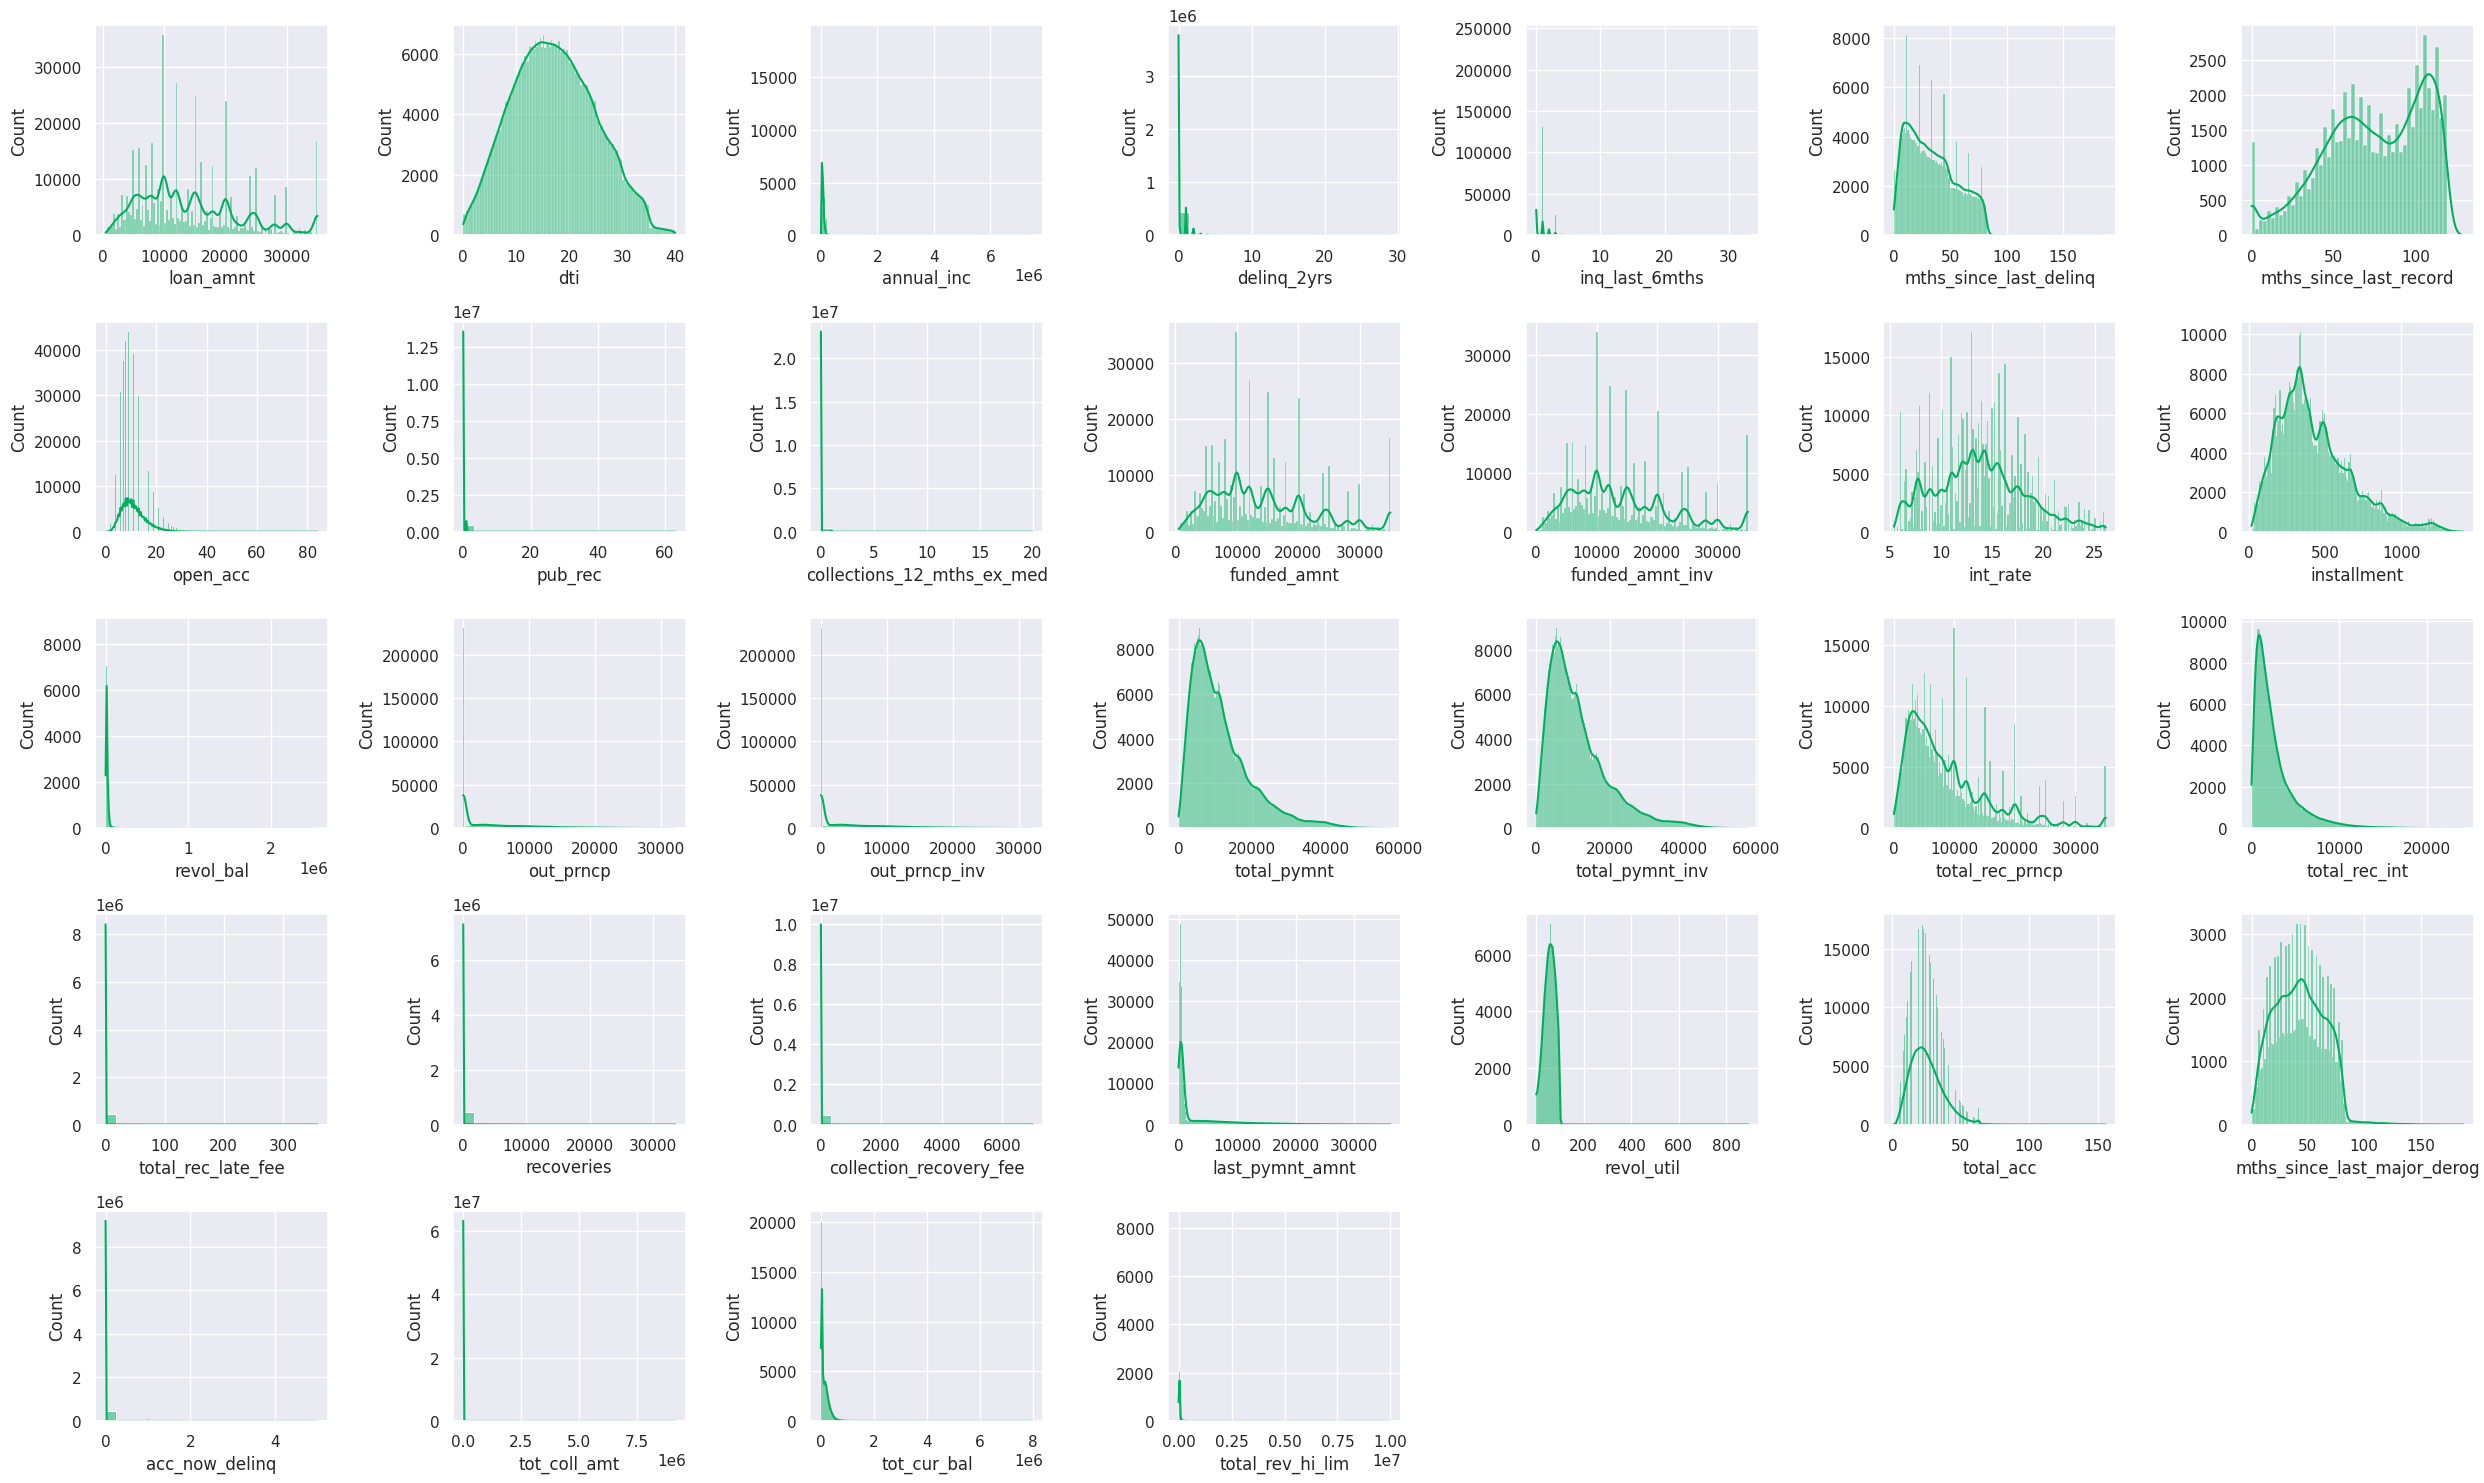

In [48]:
plt.figure(figsize=(25, 15))
n = 5
for i in range(0, len(numCols)):
    plt.subplot(n, math.ceil(len(numCols)/n), i+1)
    sns.histplot(data[numCols[i]], color='#00af5f', kde=True)
    plt.tight_layout()

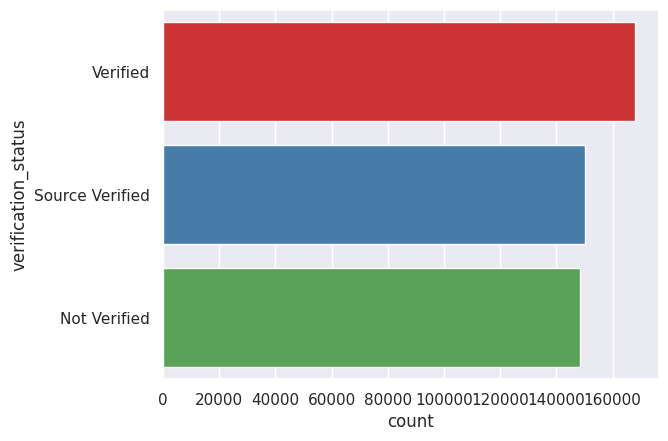

In [49]:
sns.countplot(y ='verification_status', data = data, palette = "Set1")
plt.show()

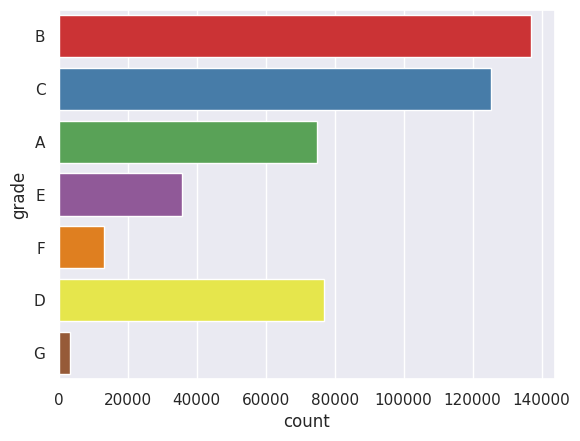

In [50]:
sns.countplot(y ='grade', data = data, palette = "Set1")
plt.show()

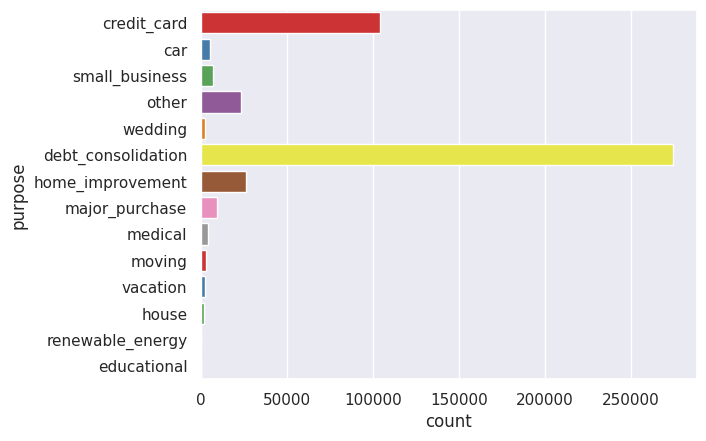

In [51]:
sns.countplot(y ='purpose', data = data, palette = "Set1")
plt.show()

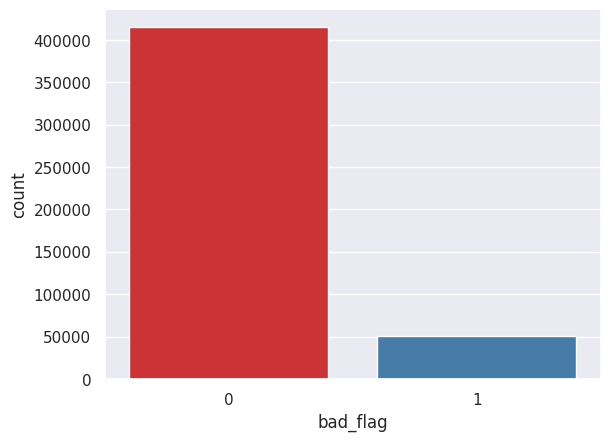

In [52]:
sns.countplot(x ='bad_flag', data = data, palette = "Set1")
plt.show()

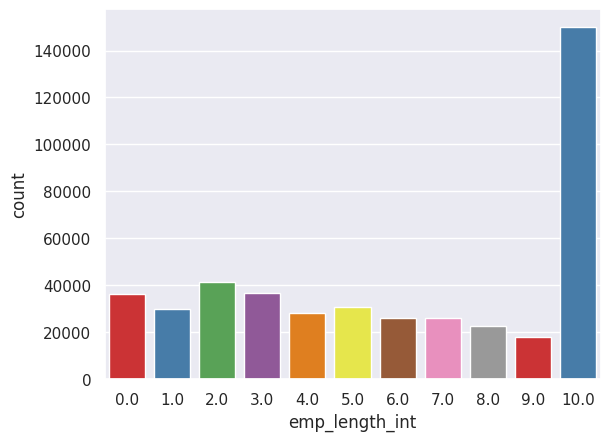

In [53]:
sns.countplot(x ='emp_length_int', data = data, palette = "Set1")
plt.show()

<ipython-input-54-6192c26816d4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='Greens', annot=True, fmt='.2f')


<Axes: >

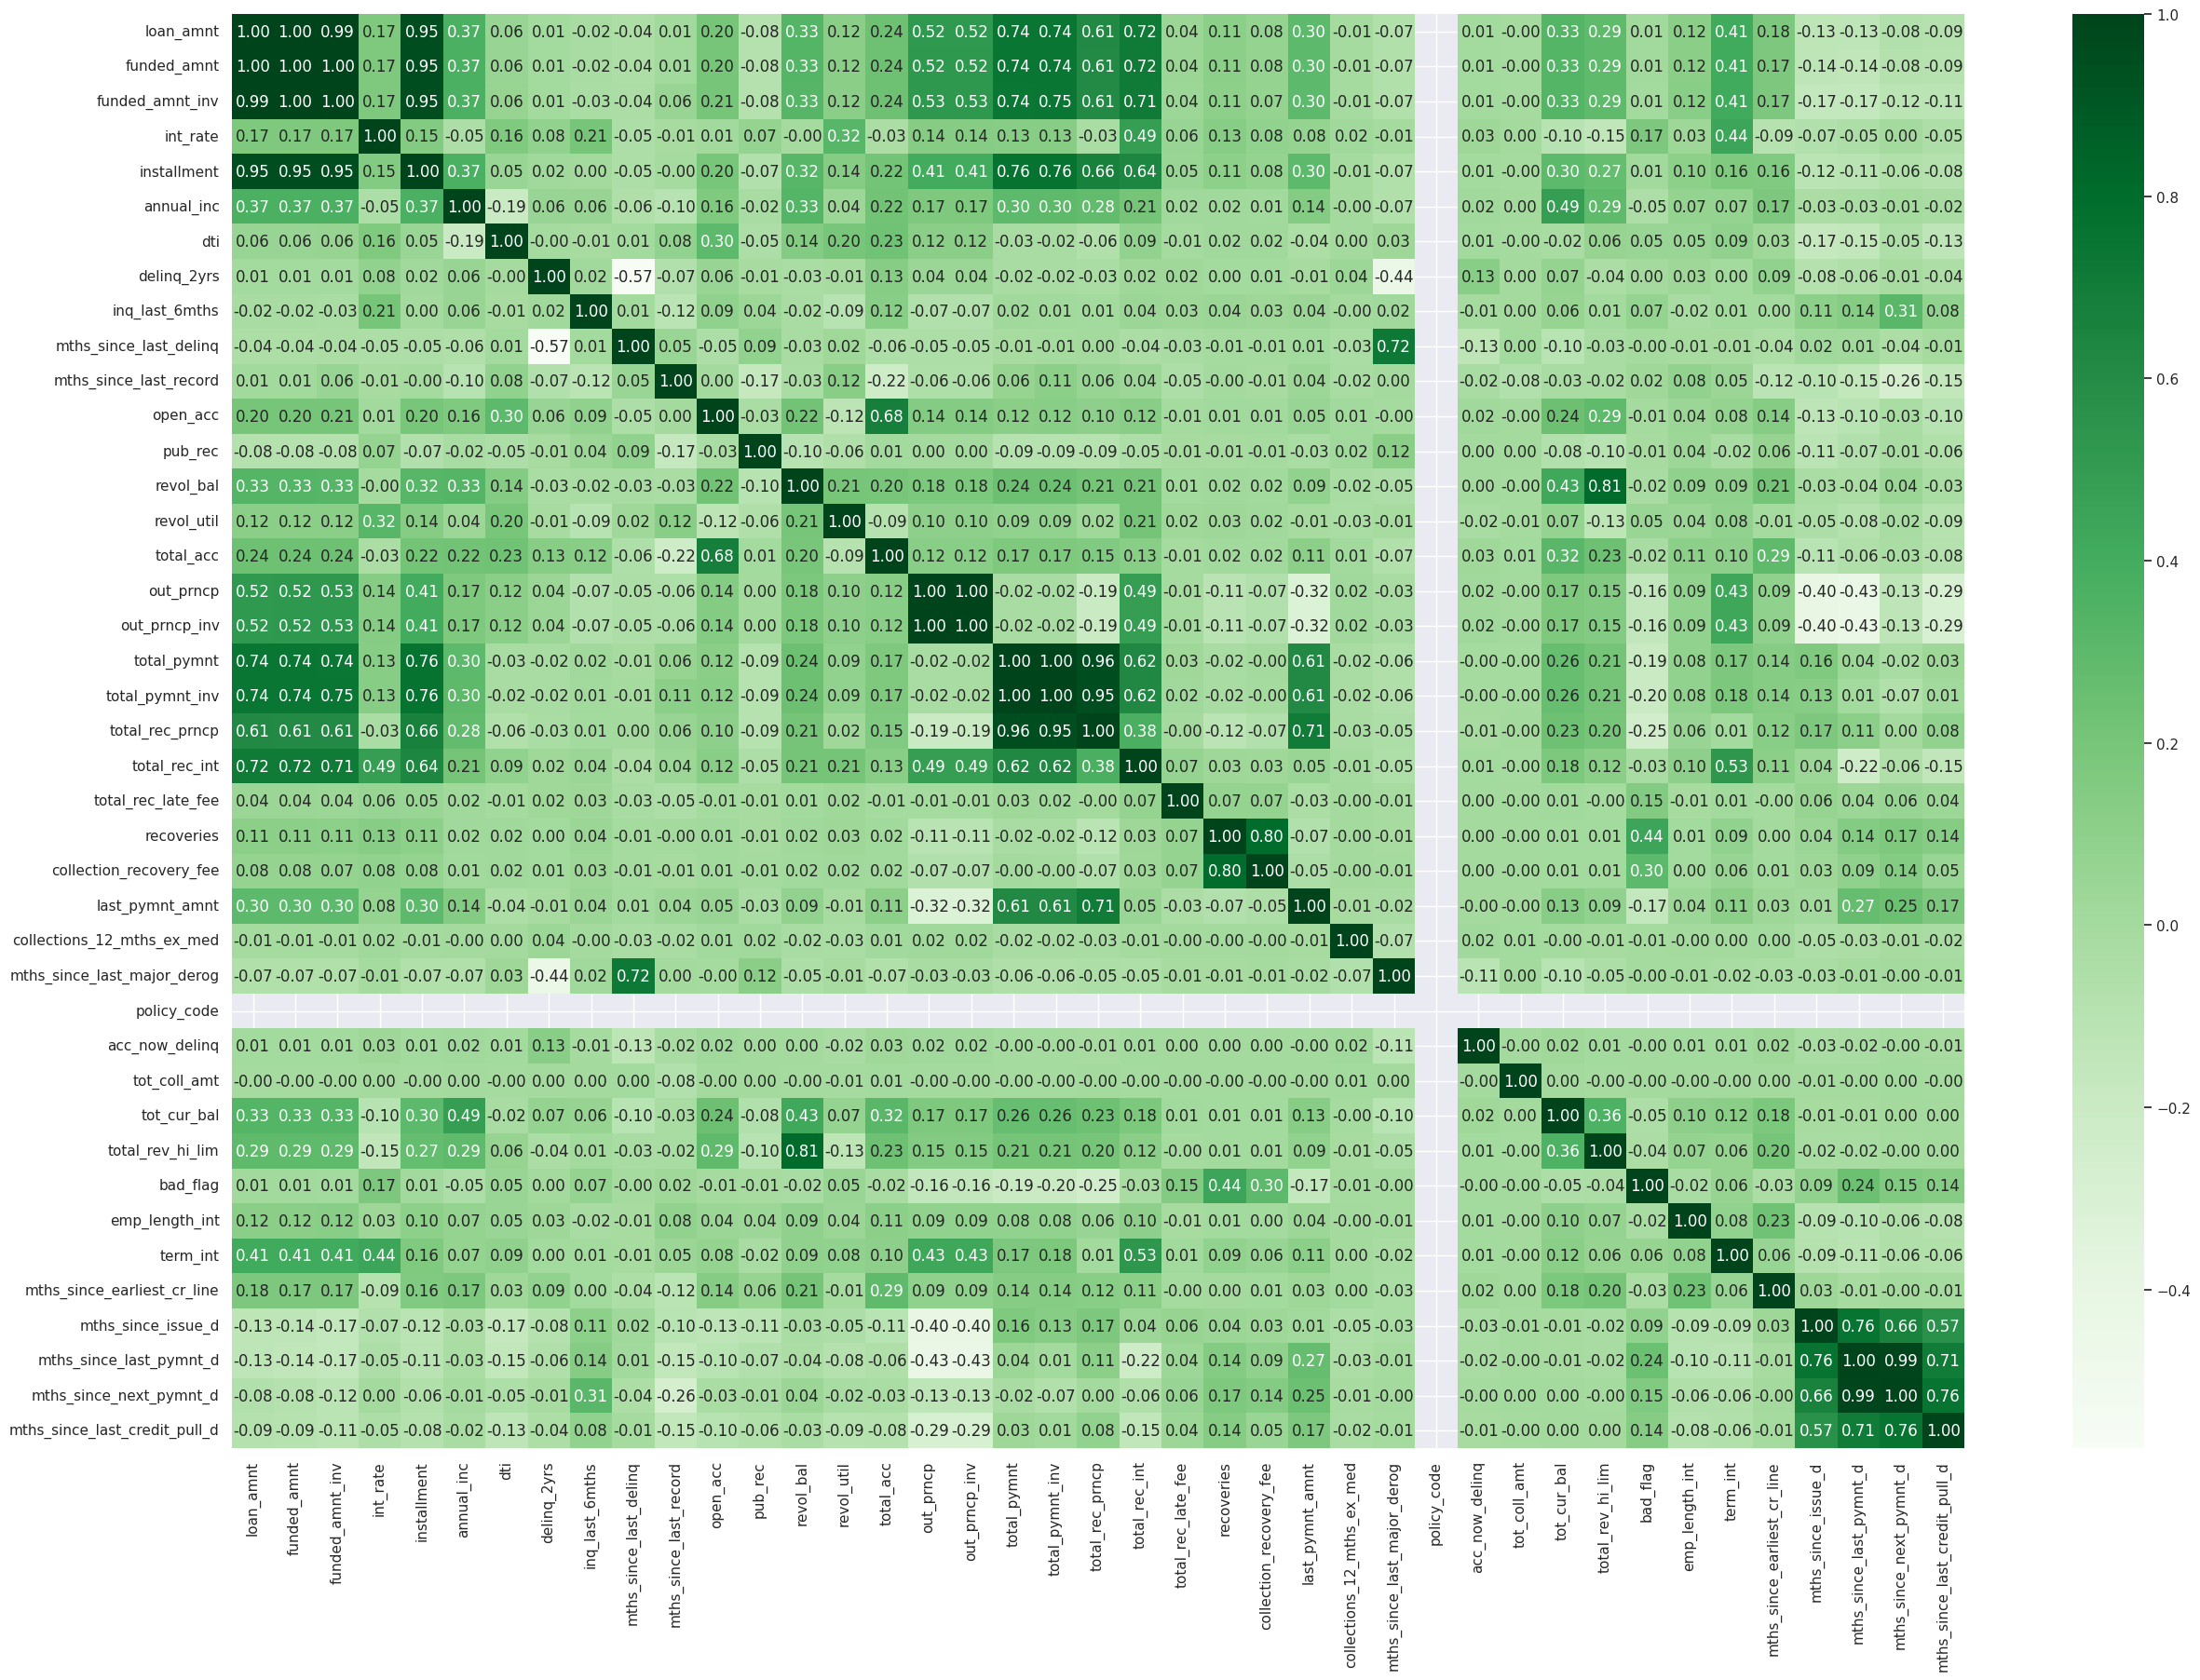

In [54]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(), cmap='Greens', annot=True, fmt='.2f')

Di sini, jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7.

In [55]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

<ipython-input-55-b958f315e56a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr().abs()
<ipython-input-55-b958f315e56a>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [56]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [57]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

### Check Categorical Features

In [58]:
data.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

Pada tahap ini dilakukan pembuangan fitur yang memiliki nilai unik yang sangat tinggi (high cardinality) dan fitur yang hanya memiliki satu nilai unik saja.

In [59]:
data.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [60]:
data.select_dtypes(exclude='object').nunique()

loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
bad_flag                            2
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line       515
mths_since_issue_d                 91
dtype: int64

Ternyata, pada tipe data selain `object` juga terdapat fitur yang hanya memiliki satu nilai unik saja, maka akan ikut dibuang juga.

In [61]:
data.drop(['policy_code'], axis=1, inplace=True)

In [62]:
for col in data.select_dtypes(include='object').columns.tolist():
    print(data[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

Fitur yang sangat didominasi oleh salah satu nilai saja akan dibuang pada tahap ini.

In [63]:
data.drop('pymnt_plan', axis=1, inplace=True)

# MISSING VALUES

### Missing Value Checking

In [64]:
print('Missing values status:', data.isnull().values.any())
nvc = pd.DataFrame(data.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/data.shape[0])*100
nvc["Data Type"] = [data[col].dtype for col in data.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
nvc["NULL Values"] = data[nvc.index].isnull().sum()
nvc

Missing values status: True


Total Null Values  Percentage Data Type  \
mths_since_last_record                  403647   86.566585   float64   
mths_since_last_delinq                  250351   53.690554   float64   
tot_coll_amt                             70276   15.071469   float64   
tot_cur_bal                              70276   15.071469   float64   
emp_length_int                           21008    4.505399     int64   
revol_util                                 340    0.072917   float64   
collections_12_mths_ex_med                 145    0.031097   float64   
total_acc                                   29    0.006219   float64   
pub_rec                                     29    0.006219    object   
open_acc                                    29    0.006219   float64   
acc_now_delinq                              29    0.006219   float64   
inq_last_6mths                              29    0.006219   float64   
mths_since_earliest_cr_line                 29    0.006219   float64   
delinq_2yrs                                 29    0.006219   float64   
annual_inc                                   4    0.000858   float64   
loan_amnt                                    0    0.000000     int64   
term_int                                     0    0.000000   float64   
bad_flag                                     0    0.000000    object   
recoveries                                   0    0.000000    object   
total_rec_late_fee                           0    0.000000   float64   
out_prncp                                    0    0.000000    object   
initial_list_status                          0    0.000000    object   
dti                                          0    0.000000    object   
revol_bal                                    0    0.000000   float64   
verification_status                          0    0.000000   float64   
int_rate                                     0    0.000000   float64   
grade                                        0    0.000000   float64   
home_ownership                               0    0.000000   float64   
addr_state                                   0    0.000000   float64   
purpose                                      0    0.000000   float64   
mths_since_issue_d                           0    0.000000     int64   

                             NULL Values  
mths_since_last_record            403647  
mths_since_last_delinq            250351  
tot_coll_amt                       70276  
tot_cur_bal                        70276  
emp_length_int                     21008  
revol_util                           340  
collections_12_mths_ex_med           145  
total_acc                             29  
pub_rec                               29  
open_acc                              29  
acc_now_delinq                        29  
inq_last_6mths                        29  
mths_since_earliest_cr_line           29  
delinq_2yrs                           29  
annual_inc                             4  
loan_amnt                              0  
term_int                               0  
bad_flag                               0  
recoveries                             0  
total_rec_late_fee                     0  
out_prncp                              0  
initial_list_status                    0  
dti                                    0  
revol_bal                              0  
verification_status                    0  
int_rate                               0  
grade                                  0  
home_ownership                         0  
addr_state                             0  
purpose                                0  
mths_since_issue_d                     0

Di sini, kolom-kolom dengan missing values di atas 75% dibuang dan kemudian pada missing value di beberapa kolom bisa diisi dengan '0' saja

In [65]:
data.drop('mths_since_last_record', axis=1, inplace=True)

### Missing Values Filling

In [66]:
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)

In [67]:
data.isna().sum()

loan_amnt                      0
int_rate                       0
grade                          0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
total_rec_late_fee             0
recoveries                     0
collections_12_mths_ex_med     0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
bad_flag                       0
emp_length_int                 0
term_int                       0
mths_since_earliest_cr_line    0
mths_since_issue_d             0
dtype: int

# `FEATURE SCALING AND TRANSFORMATION`
---

In [68]:
data.sample()

loan_amnt  int_rate grade home_ownership  annual_inc  \
292156      13375     25.57     F       MORTGAGE     45000.0   

       verification_status             purpose addr_state   dti  delinq_2yrs  \
292156     Source Verified  debt_consolidation         CA  16.8          0.0   

        inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  \
292156             1.0                    29.0      10.0      0.0       3393   

        revol_util  total_acc initial_list_status  out_prncp  \
292156        33.9       31.0                   w        0.0   

        total_rec_late_fee  recoveries  collections_12_mths_ex_med  \
292156                 0.0         0.0                         0.0   

        acc_now_delinq  tot_coll_amt  tot_cur_bal  bad_flag  emp_length_int  \
292156             0.0           0.0      15292.0         0             4.0   

        term_int  mths_since_earliest_cr_line  mths_since_issue_d  
292156      60.0                        332.0                38.0

### One Hot Encoding

Semua kolom kategorikal dilakukan One Hot Encoding.

In [69]:
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]

In [70]:
onehot = pd.get_dummies(data[categorical_cols], drop_first=True)

In [71]:
onehot.head()

grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
0        1        0        0        0        0        0   
1        0        1        0        0        0        0   
2        0        1        0        0        0        0   
3        0        1        0        0        0        0   
4        1        0        0        0        0        0   

   home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
0                        0                    0                     0   
1                        0                    0                     0   
2                        0                    0                     0   
3                        0                    0                     0   
4                        0                    0                     0   

   home_ownership_OWN  home_ownership_RENT  \
0                   0                    1   
1                   0                    1   
2                   0                    1   
3                   0                    1   
4                   0                    1   

   verification_status_Source Verified  verification_status_Verified  \
0                                    0                             1   
1                                    1                             0   
2                                    0                             0   
3                                    1                             0   
4                                    1                             0   

   purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
0                    1                           0                    0   
1                    0                           0                    0   
2                    0                           0                    0   
3                    0                           0                    0   
4                    0                           0                    0   

   purpose_home_improvement  purpose_house  purpose_major_purchase  \
0                         0              0                       0   
1                         0              0                       0   
2                         0              0                       0   
3                         0              0                       0   
4                         0              0                       0   

   purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  \
0                0               0              0                         0   
1                0               0              0                         0   
2                0               0              0                         0   
3                0               0              1                         0   
4                0               0              1                         0   

   purpose_small_business  purpose_vacation  purpose_wedding  addr_state_AL  \
0                       0                 0                0              0   
1                       0                 0                0              0   
2                       1                 0                0              0   
3                       0                 0                0              0   
4                       0                 0                0              0   

   addr_state_AR  addr_state_AZ  addr_state_CA  addr_state_CO  addr_state_CT  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              1              0              0   
4              0              0              0              0              0   

   addr_state_DC  addr_state_DE  addr_state_FL  addr_state_GA  addr_state_HI  \
0              0              0              0              0              0   
1              0              0     

### Standardization

Semua kolom numerikal dilakukan proses standarisasi dengan StandardScaler.

In [72]:
numerical_cols = [col for col in data.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [73]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [74]:
std.head()

loan_amnt  int_rate  annual_inc       dti  delinq_2yrs  inq_last_6mths  \
0  -1.124392 -0.729587   -0.896551  1.328632    -0.357012        0.178920   
1  -1.426088  0.330634   -0.787387 -2.065791    -0.357012        3.843328   
2  -1.438156  0.488979   -1.110294 -1.082491    -0.357012        1.095022   
3  -0.521001 -0.077850   -0.438063  0.354248    -0.357012        0.178920   
4  -1.365749 -0.261438    0.122311  0.091865    -0.357012       -0.737182   

   mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  \
0               -0.708792 -1.641166 -0.31429  -0.124888    1.159498   
1               -0.708792 -1.641166 -0.31429  -0.703378   -1.965980   
2               -0.708792 -1.841641 -0.31429  -0.642003    1.782070   
3                0.860811 -0.237839 -0.31429  -0.514224   -1.478018   
4                0.991612  0.764538 -0.31429   0.558748   -0.094058   

   total_acc  out_prncp  total_rec_late_fee  recoveries  \
0  -1.384557  -0.693944           -0.123464   -0.154549   
1  -1.815538  -0.693944           -0.123464    0.057470   
2  -1.298361  -0.693944           -0.123464   -0.154549   
3   1.028934  -0.693944            3.099264   -0.154549   
4   1.115130  -0.573268           -0.123464   -0.154549   

   collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                   -0.083608       -0.058307     -0.012089    -0.792648   
1                   -0.083608       -0.058307     -0.012089    -0.792648   
2                   -0.083608       -0.058307     -0.012089    -0.792648   
3                   -0.083608       -0.058307     -0.012089    -0.792648   
4                   -0.083608       -0.058307     -0.012089    -0.792648   

   emp_length_int  term_int  mths_since_earliest_cr_line  mths_since_issue_d  
0        1.138605 -0.616225                     1.764941            1.446626  
1       -1.523744  1.622784                    -0.212426            1.446626  
2        1.138605 -0.616225                    -0.570896            1.446626  
3        1.138605 -0.616225                     0.226989            1.446626  
4       -1.257509  1.622784                     0.238553            1.446626

### Transformed Dataframe

Menggabungkan kembali kolom-kolom hasil transformasi

In [75]:
data_model = pd.concat([onehot, std, data[['bad_flag']]], axis=1)

# MODELING

### Train-Test Split

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
X_train.shape, X_test.shape

((373028, 99), (93257, 99))

### Training

In [79]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.svm import SVC # Support Vector Machine/Classifier
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.ensemble import GradientBoostingClassifier #gradient boosting
from xgboost import XGBClassifier #xgboost
from sklearn.ensemble import AdaBoostClassifier #Adaboost

from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve #roc score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

import re
import warnings
warnings.filterwarnings('ignore')

##  Function for Model Evaluation

In [80]:
train_classifier_list = []
train_modelname_list = []
train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_f1_score_list= []
train_roc_auc_score_list = []
train_cross_val_f1_list = []
train_cross_val_rocauc_list = []

test_classifier_list = []
test_modelname_list = []
test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f1_score_list= []
test_roc_auc_score_list = []
test_cross_val_f1_list = []
test_cross_val_rocauc_list = []

In [81]:
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
X_s, y_s = shuffle(X, y, random_state=42)
kf = KFold(10, shuffle=True, random_state=0)

## Function Evaluation for Recap Classification

In [82]:
def eval_classification(model, model_name, save=True):
    # predict train
    y_train_pred = model.predict(X_train)
    y_train_pred_prob = model.predict_proba(X_train)

    # predict test
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)

    # cross validation
    cv_score_f1 = cross_validate(model, X_s, y_s, cv=kf, scoring='f1', return_train_score=True)
    cv_score_rocauc = cross_validate(model, X_s, y_s, cv=kf, scoring='roc_auc', return_train_score=True)


    accuracy_train = round(accuracy_score(y_train, y_train_pred), 3)
    precision_train = round(precision_score(y_train, y_train_pred), 3)
    recall_train = round(recall_score(y_train, y_train_pred), 3)
    f1_s_train = round(f1_score(y_train, y_train_pred), 3)
    csf_score_train = round(cv_score_f1['train_score'].mean(), 3)
    rocauc_score_train = round(roc_auc_score(y_train, y_train_pred_prob[:, 1]), 3)
    csr_score_train = round(cv_score_rocauc['train_score'].mean(), 3)

    accuracy_test = round(accuracy_score(y_test, y_test_pred), 3)
    precision_test = round(precision_score(y_test, y_test_pred), 3)
    recall_test = round(recall_score(y_test, y_test_pred), 3)
    f1_s_test = round(f1_score(y_test, y_test_pred), 3)
    csf_score_test = round(cv_score_f1['test_score'].mean(), 3)
    rocauc_score_test = round(roc_auc_score(y_test, y_test_pred_prob[:, 1]), 3)
    csr_score_test = round(cv_score_rocauc['test_score'].mean(), 3)

    if save :

        # save report detail train
        train_classifier_list.append(model)
        train_modelname_list.append(model_name)
        train_accuracy_list.append(accuracy_train)
        train_precision_list.append(precision_train)
        train_recall_list.append(recall_train)
        train_f1_score_list.append(f1_s_train)
        train_cross_val_f1_list.append(csf_score_train)
        train_roc_auc_score_list.append(rocauc_score_train)
        train_cross_val_rocauc_list.append(csr_score_train)

        # save report detail test
        test_classifier_list.append(model)
        test_modelname_list.append(model_name)
        test_accuracy_list.append(accuracy_test)
        test_precision_list.append(precision_test)
        test_recall_list.append(recall_test)
        test_f1_score_list.append(f1_s_test)
        test_cross_val_f1_list.append(csf_score_test)
        test_roc_auc_score_list.append(rocauc_score_test)
        test_cross_val_rocauc_list.append(csr_score_test)


    metrics_summary = pd.DataFrame({
        'Evaluation Metrics' : ["Accuracy", "Precision", "Recall", "F1 Score", "F1 Score (crossval)", "ROC AUC", "ROC AUC (crossval)"],
        'Train' : [accuracy_train, precision_train, recall_train, f1_s_train, csf_score_train, rocauc_score_train, csr_score_train],
        'Test' : [accuracy_test, precision_test, recall_test, f1_s_test, csf_score_test, rocauc_score_test, csr_score_test]})

    metrics_summary["Diff Range"] = metrics_summary['Train'] - metrics_summary['Test']
    return metrics_summary.reset_index(drop = True).style.background_gradient(cmap='Purples')

# define function to see the best tuning hyperparameter
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Function Evaluation for Training

In [83]:
def model_eval_train(classifier, model_name, X_train, y_train):
    # predict data train
    y_train_pred = classifier.predict(X_train)
    y_train_pred_prob = classifier.predict_proba(X_train)

    # print classification report
    print('Classification Report Training Model ('+model_name+'):\n')
    accuracy = round(accuracy_score(y_train, y_train_pred), 3)
    precision = round(precision_score(y_train, y_train_pred), 3)
    recall = round(recall_score(y_train, y_train_pred), 3)
    f1_s = round(f1_score(y_train, y_train_pred), 3)
    rocauc_score = round(roc_auc_score(y_train, y_train_pred_prob[:, 1]), 3)

    # c_val_score = round(cross_val_score(classifier, X_s, y_s, cv=kf, scoring='roc_auc').mean()  , 3)
    cv_score_f1 = cross_validate(classifier, X_s, y_s, cv=kf, scoring='f1', return_train_score=True)
    csf_score = round(cv_score_f1['train_score'].mean(), 3)

    cv_score_rocauc = cross_validate(classifier, X_s, y_s, cv=kf, scoring='roc_auc', return_train_score=True)
    csr_score = round(cv_score_rocauc['train_score'].mean(), 3)

    print(f'Accuracy = {accuracy}')
    print(f'Precision = {precision}')
    print(f'Recall = {recall}')
    print(f'F1 Score = {f1_s}')
    print(f'Cross Val F1 (k=5) = {csf_score}')
    print(f'ROC AUC = {rocauc_score}')
    print(f'Cross Val ROC AUC (k=5) = {csr_score}\n')

    print(classification_report(y_train, y_train_pred))

    # form confusion matrix as a dataFrame
    conf_matrix = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('good', 'bad'), ('good', 'bad'))
    tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()

    print("==== Actual Data (Train) =====")
    print("Total =", len(y_train))
    print("good =", len(y_train[y_train == 0]))
    print("bad =", len(y_train[y_train == 1]))
    print("==== Predicted Data (Train) =====")
    print("TP = {}, FP = {}, TN = {}, FN = {}".format(tp, fp, tn, fn))
    print("Predictly Correct =", tn+tp)
    print("Predictly Wrong =", fn+fp, "\n")

    # plot confusion matrix
    plt.figure(figsize=[8,5])

    c_matrix = confusion_matrix(y_train, y_train_pred)
    names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    heatmap = sns.heatmap(conf_matrix, annot = labels, annot_kws={'size': 13}, fmt='', cmap='Greens')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

    plt.title('Confusion Matrix for Training Model ('+model_name+')\n', fontsize=13, color='black')
    plt.ylabel('Actual Label', fontsize=13)
    plt.xlabel('\nPredicted Label', fontsize=13)
    plt.show()
    print("\n")

    # ROC AUC Curve
    plt.figure(figsize=[8,5])
    fpr, tpr, threshold = roc_curve(y_train, y_train_pred_prob[:, 1])
    plt.plot(fpr, tpr, label = model_name+' (Area (Score) = %0.2f)'%rocauc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Is Data Good or Bad')
    plt.legend(loc="lower right")
    plt.show()

## Function Evaluation for Test

In [84]:
def model_eval_test(classifier, model_name, X_test, y_test):

     # predict data test
    y_test_pred = classifier.predict(X_test)
    y_test_pred_prob = classifier.predict_proba(X_test)


    # print classification report
    print('Classification Report Testing Model ('+model_name+'):\n')
    accuracy = round(accuracy_score(y_test, y_test_pred), 3)
    precision = round(precision_score(y_test, y_test_pred), 3)
    recall = round(recall_score(y_test, y_test_pred), 3)
    f1_s = round(f1_score(y_test, y_test_pred), 3)
    rocauc_score = round(roc_auc_score(y_test, y_test_pred_prob[:, 1]), 3)

    # c_val_score = round(cross_val_score(classifier, X_s, y_s , cv=kf , scoring='roc_auc').mean()  , 3)
    cv_score_f1 = cross_validate(classifier, X_s, y_s, cv=kf, scoring='f1', return_train_score=True)
    csf_score = round(cv_score_f1['test_score'].mean(), 3)

    cv_score_rocauc = cross_validate(classifier, X_s, y_s, cv=kf, scoring='roc_auc', return_train_score=True)
    csr_score = round(cv_score_rocauc['test_score'].mean(), 3)

    print(f'Accuracy = {accuracy}')
    print(f'Precision = {precision}')
    print(f'Recall = {recall}')
    print(f'F1 Score = {f1_s}')
    print(f'Cross Val F1 (k=5) = {csf_score}')
    print(f'ROC AUC = {rocauc_score}')
    print(f'Cross Val ROC AUC (k=5) = {csr_score}\n')

    print(classification_report(y_test, y_test_pred))

    # form confusion matrix as a dataFrame
    conf_matrix = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('good', 'bad'), ('good', 'bad'))
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

    print("==== Actual Data (Test) =====")
    print("Total =", len(y_test))
    print("good =", len(y_test[y_test == 0]))
    print("bad =", len(y_test[y_test == 1]))
    print("==== Predicted Data (Test) =====")
    print("TP = {}, FP = {}, TN = {}, FN = {}".format(tp, fp, tn, fn))
    print("Predictly Correct =", tn+tp)
    print("Predictly Wrong =", fn+fp, "\n")

    # plot confusion matrix
    plt.figure(figsize=[8,5])

    c_matrix = confusion_matrix(y_test, y_test_pred)
    names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    heatmap = sns.heatmap(conf_matrix, annot = labels, annot_kws={'size': 13}, fmt='', cmap='Oranges')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

    plt.title('Confusion Matrix for Testing Model ('+model_name+')\n', fontsize=13, color='black')
    plt.ylabel('Actual Label', fontsize=13)
    plt.xlabel('\nPredicted Label', fontsize=13)
    plt.show()
    print("\n")

    # ROC AUC Curve
    plt.figure(figsize=[8,5])
    fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob[:, 1])
    plt.plot(fpr, tpr, label = model_name+' (Area (Score) = %0.2f)'%rocauc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Is Data Good or Bad')
    plt.legend(loc="lower right")
    plt.show()

# `TRAINING`
---

## Decision Tree

In [85]:
# train the model
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
print(dt_model)
eval_classification(dt_model, "Decision Tree")

DecisionTreeClassifier(random_state=42)


Classification Report Training Model (Decision Tree):

Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1 Score = 1.0
Cross Val F1 (k=5) = 1.0
ROC AUC = 1.0
Cross Val ROC AUC (k=5) = 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    332250
           1       1.00      1.00      1.00     40778

    accuracy                           1.00    373028
   macro avg       1.00      1.00      1.00    373028
weighted avg       1.00      1.00      1.00    373028

==== Actual Data (Train) =====
Total = 373028
good = 332250
bad = 40778
==== Predicted Data (Train) =====
TP = 40778, FP = 0, TN = 332250, FN = 0
Predictly Correct = 373028
Predictly Wrong = 0 



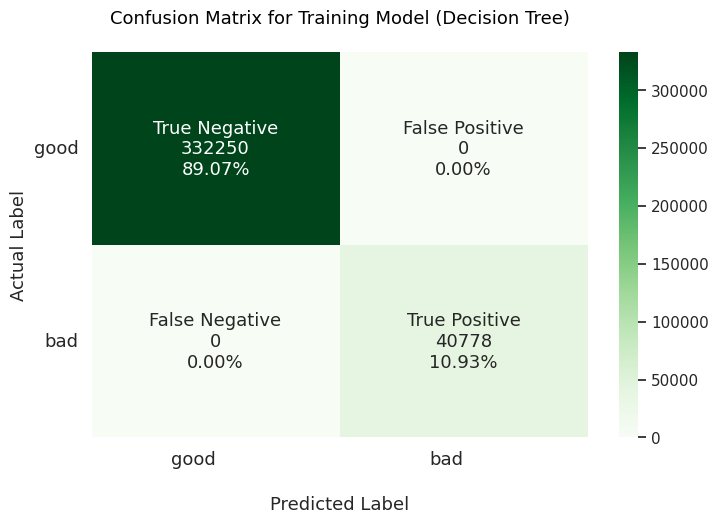

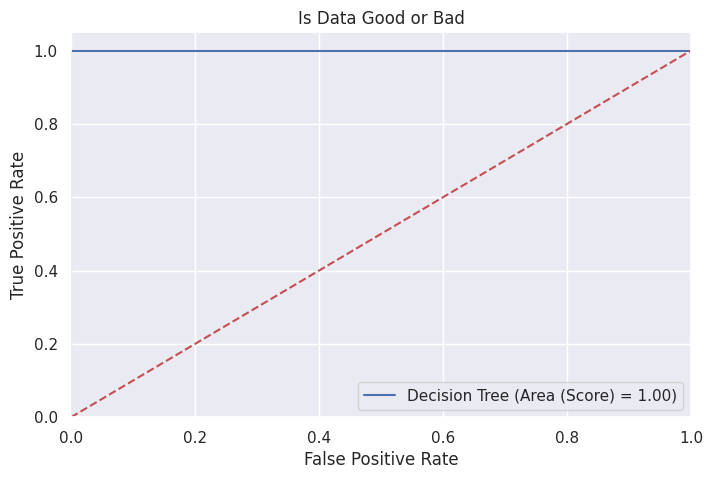

In [86]:
model_eval_train(dt_model, "Decision Tree", X_train, y_train)

Classification Report Testing Model (Decision Tree):

Accuracy = 0.903
Precision = 0.555
Recall = 0.583
F1 Score = 0.569
Cross Val F1 (k=5) = 0.571
ROC AUC = 0.763
Cross Val ROC AUC (k=5) = 0.765

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     83067
           1       0.56      0.58      0.57     10190

    accuracy                           0.90     93257
   macro avg       0.75      0.76      0.76     93257
weighted avg       0.91      0.90      0.90     93257

==== Actual Data (Test) =====
Total = 93257
good = 83067
bad = 10190
==== Predicted Data (Test) =====
TP = 5940, FP = 4760, TN = 78307, FN = 4250
Predictly Correct = 84247
Predictly Wrong = 9010 



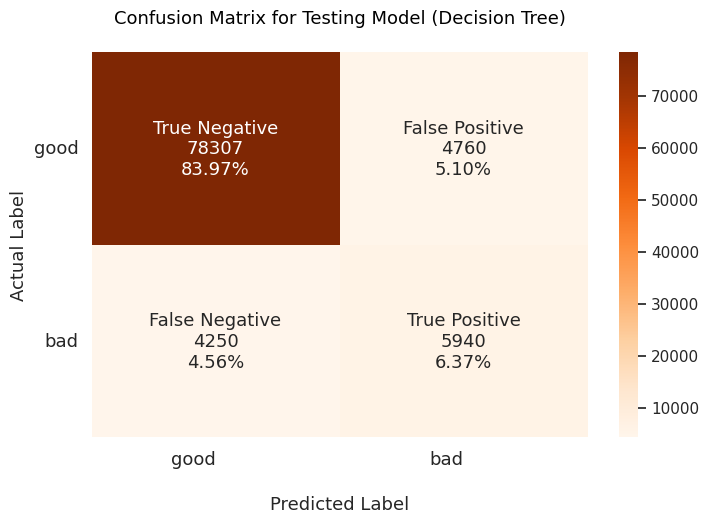

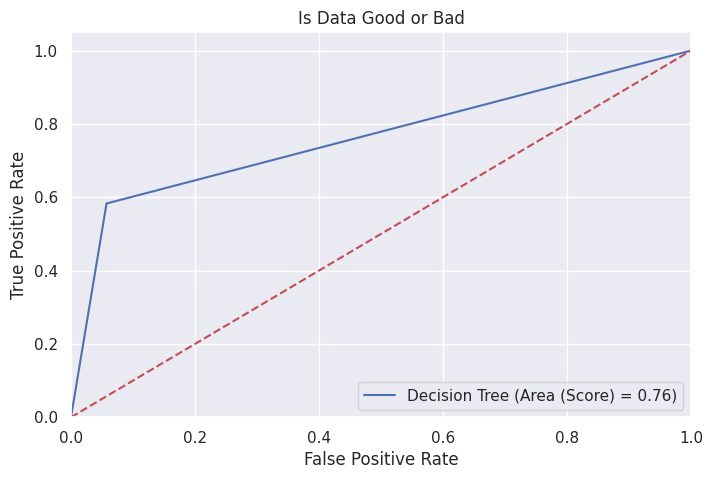

In [87]:
model_eval_test(dt_model, "Decision Tree", X_test, y_test)

In [88]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_dt_train))
print("Testing Accuracy: {} %".format(acc_dt_test))

Training Accuracy: 100.0 %
Testing Accuracy: 90.34 %


## Naive Bayes

In [89]:
# train the model
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)
eval_classification(gnb_model, "Naive Bayes")

GaussianNB()


Classification Report Training Model (Naive Bayes):

Accuracy = 0.859
Precision = 0.403
Recall = 0.606
F1 Score = 0.484
Cross Val F1 (k=5) = 0.529
ROC AUC = 0.811
Cross Val ROC AUC (k=5) = 0.81

              precision    recall  f1-score   support

           0       0.95      0.89      0.92    332250
           1       0.40      0.61      0.48     40778

    accuracy                           0.86    373028
   macro avg       0.68      0.75      0.70    373028
weighted avg       0.89      0.86      0.87    373028

==== Actual Data (Train) =====
Total = 373028
good = 332250
bad = 40778
==== Predicted Data (Train) =====
TP = 24713, FP = 36670, TN = 295580, FN = 16065
Predictly Correct = 320293
Predictly Wrong = 52735 



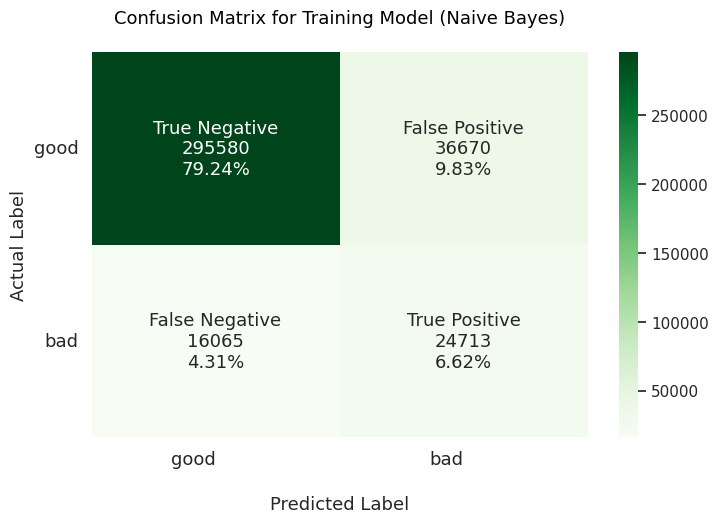

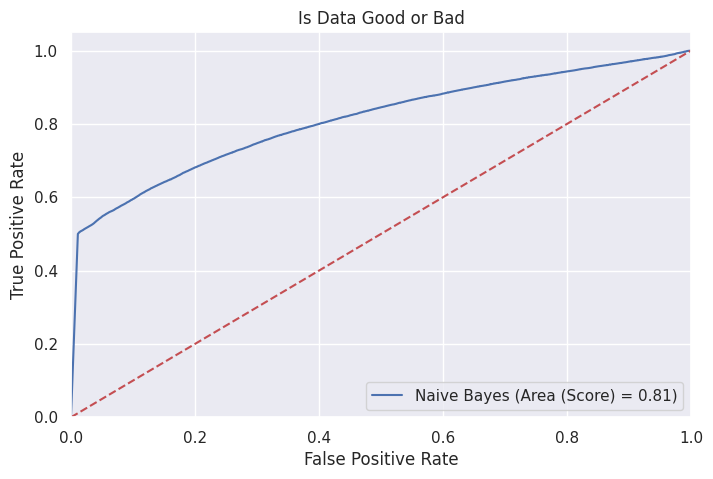

In [90]:
model_eval_train(gnb_model, "Naive Bayes", X_train, y_train)

Classification Report Testing Model (Naive Bayes):

Accuracy = 0.859
Precision = 0.404
Recall = 0.61
F1 Score = 0.486
Cross Val F1 (k=5) = 0.529
ROC AUC = 0.81
Cross Val ROC AUC (k=5) = 0.809

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     83067
           1       0.40      0.61      0.49     10190

    accuracy                           0.86     93257
   macro avg       0.68      0.75      0.70     93257
weighted avg       0.89      0.86      0.87     93257

==== Actual Data (Test) =====
Total = 93257
good = 83067
bad = 10190
==== Predicted Data (Test) =====
TP = 6215, FP = 9160, TN = 73907, FN = 3975
Predictly Correct = 80122
Predictly Wrong = 13135 



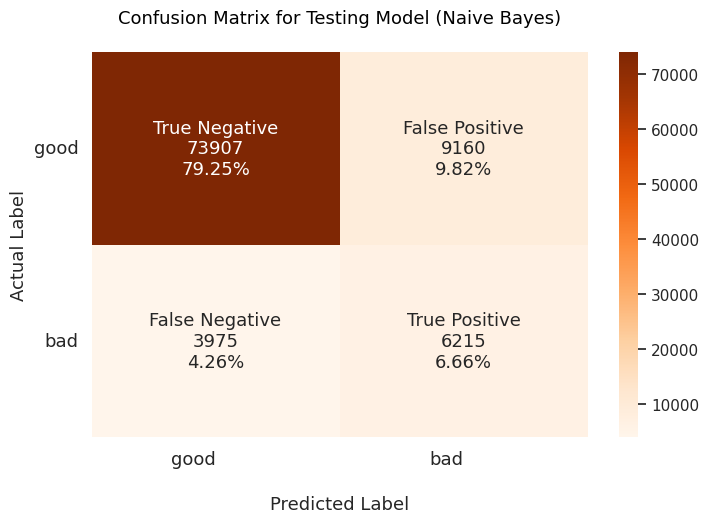

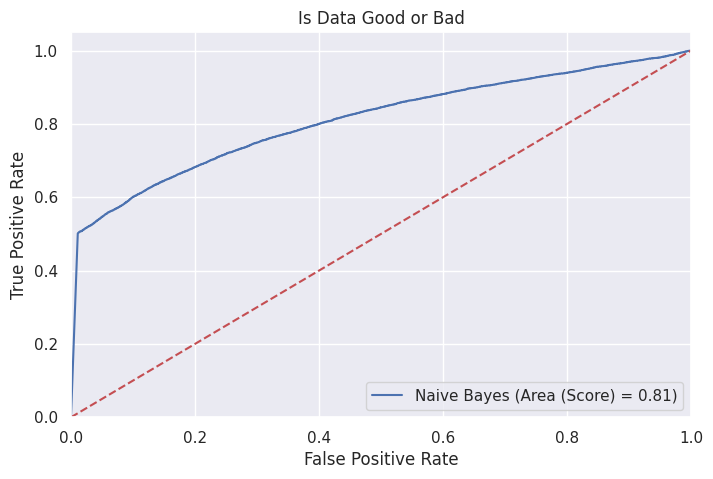

In [91]:
model_eval_test(gnb_model, "Naive Bayes", X_test, y_test)

In [92]:
acc_gnb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_gnb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_gnb_train))
print("Test Accuracy: {} %".format(acc_gnb_test))

Training Accuracy: 85.86 %
Test Accuracy: 85.92 %


## AdaBoostClassifier

In [93]:
# train the model
adab_model = AdaBoostClassifier(random_state=42).fit(X_train, y_train)
eval_classification(adab_model, "Adaboost Classifier")

Classification Report Training Model (Adaboost Classifier):

Accuracy = 0.943
Precision = 0.975
Recall = 0.495
F1 Score = 0.656
Cross Val F1 (k=5) = 0.657
ROC AUC = 0.876
Cross Val ROC AUC (k=5) = 0.876

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    332250
           1       0.98      0.49      0.66     40778

    accuracy                           0.94    373028
   macro avg       0.96      0.75      0.81    373028
weighted avg       0.95      0.94      0.93    373028

==== Actual Data (Train) =====
Total = 373028
good = 332250
bad = 40778
==== Predicted Data (Train) =====
TP = 20168, FP = 511, TN = 331739, FN = 20610
Predictly Correct = 351907
Predictly Wrong = 21121 



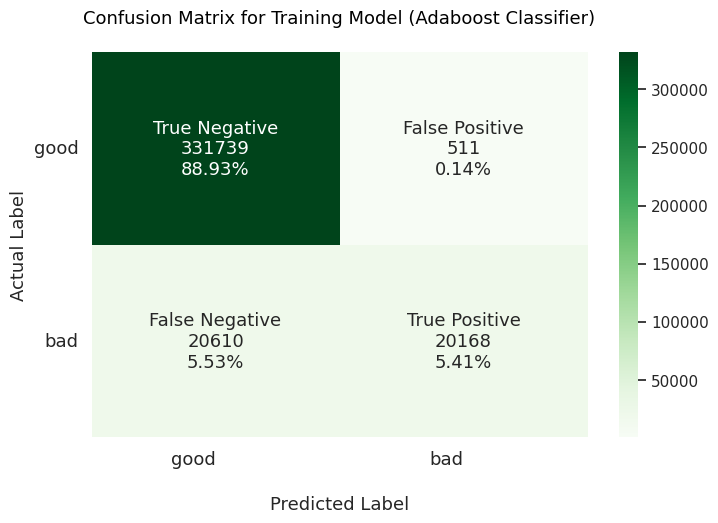

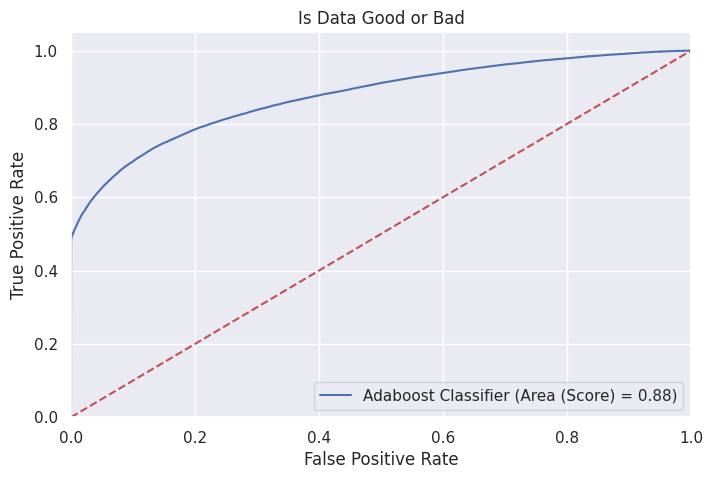

In [94]:
model_eval_train(adab_model, "Adaboost Classifier", X_train, y_train)

Classification Report Testing Model (Adaboost Classifier):

Accuracy = 0.944
Precision = 0.982
Recall = 0.496
F1 Score = 0.659
Cross Val F1 (k=5) = 0.657
ROC AUC = 0.874
Cross Val ROC AUC (k=5) = 0.875

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     83067
           1       0.98      0.50      0.66     10190

    accuracy                           0.94     93257
   macro avg       0.96      0.75      0.81     93257
weighted avg       0.95      0.94      0.94     93257

==== Actual Data (Test) =====
Total = 93257
good = 83067
bad = 10190
==== Predicted Data (Test) =====
TP = 5058, FP = 92, TN = 82975, FN = 5132
Predictly Correct = 88033
Predictly Wrong = 5224 



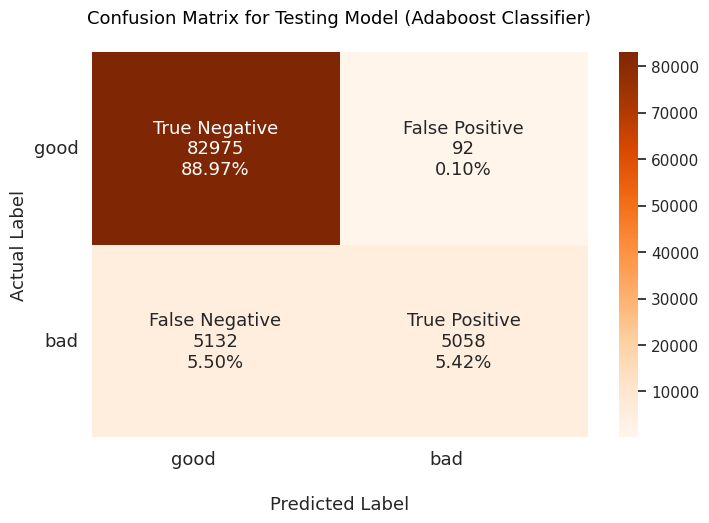

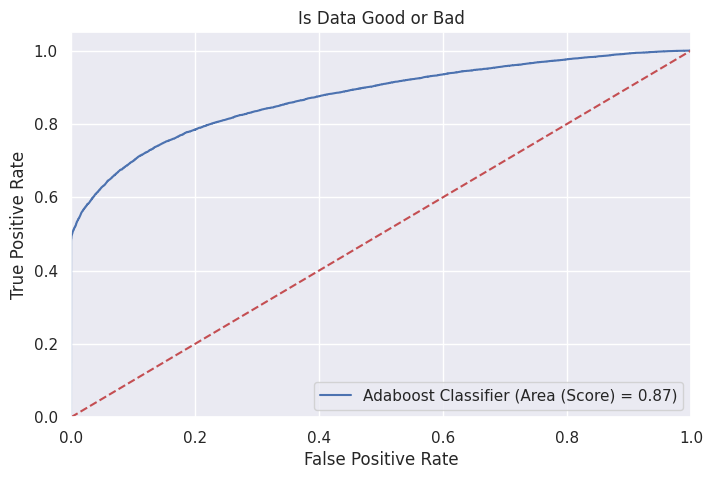

In [95]:
model_eval_test(adab_model, "Adaboost Classifier", X_test, y_test)

In [96]:
acc_adab_train=round(adab_model.score(X_train,y_train)*100,2)
acc_adab_test=round(adab_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_adab_train))
print("Test Accuracy: {} %".format(acc_adab_test))

Training Accuracy: 94.34 %
Test Accuracy: 94.4 %


In [97]:
# train the model
log_model = LogisticRegression(solver='lbfgs', max_iter=len(X_train), random_state=42).fit(X_train, y_train)
print(log_model)
eval_classification(log_model, "Logistic Regression")

LogisticRegression(max_iter=373028, random_state=42)


Classification Report Training Model (Logistic Regression):

Accuracy = 0.939
Precision = 0.98
Recall = 0.455
F1 Score = 0.621
Cross Val F1 (k=5) = 0.623
ROC AUC = 0.855
Cross Val ROC AUC (k=5) = 0.856

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    332250
           1       0.98      0.46      0.62     40778

    accuracy                           0.94    373028
   macro avg       0.96      0.73      0.79    373028
weighted avg       0.94      0.94      0.93    373028

==== Actual Data (Train) =====
Total = 373028
good = 332250
bad = 40778
==== Predicted Data (Train) =====
TP = 18555, FP = 381, TN = 331869, FN = 22223
Predictly Correct = 350424
Predictly Wrong = 22604 



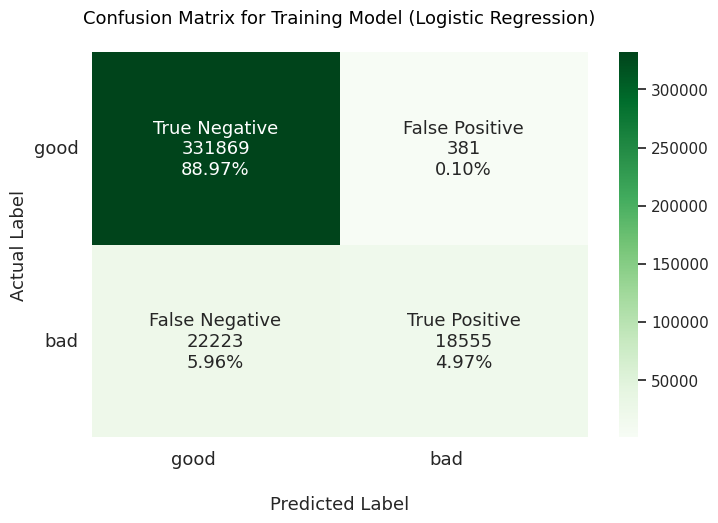

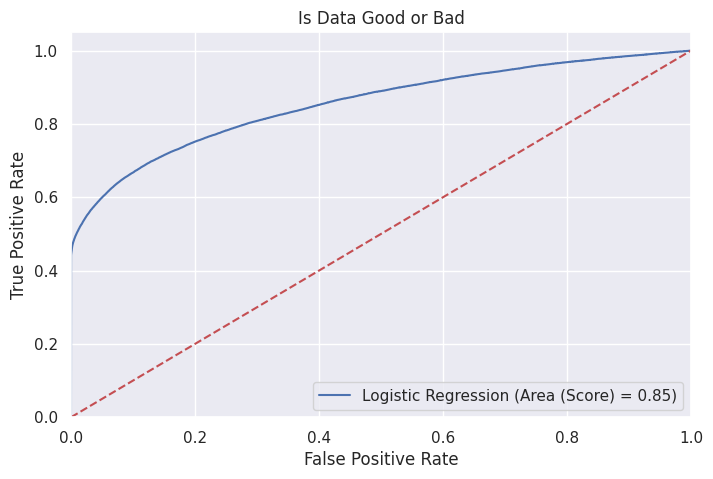

In [98]:
model_eval_train(log_model, "Logistic Regression", X_train, y_train)

Classification Report Testing Model (Logistic Regression):

Accuracy = 0.94
Precision = 0.981
Recall = 0.456
F1 Score = 0.623
Cross Val F1 (k=5) = 0.623
ROC AUC = 0.856
Cross Val ROC AUC (k=5) = 0.855

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     83067
           1       0.98      0.46      0.62     10190

    accuracy                           0.94     93257
   macro avg       0.96      0.73      0.80     93257
weighted avg       0.94      0.94      0.93     93257

==== Actual Data (Test) =====
Total = 93257
good = 83067
bad = 10190
==== Predicted Data (Test) =====
TP = 4649, FP = 88, TN = 82979, FN = 5541
Predictly Correct = 87628
Predictly Wrong = 5629 



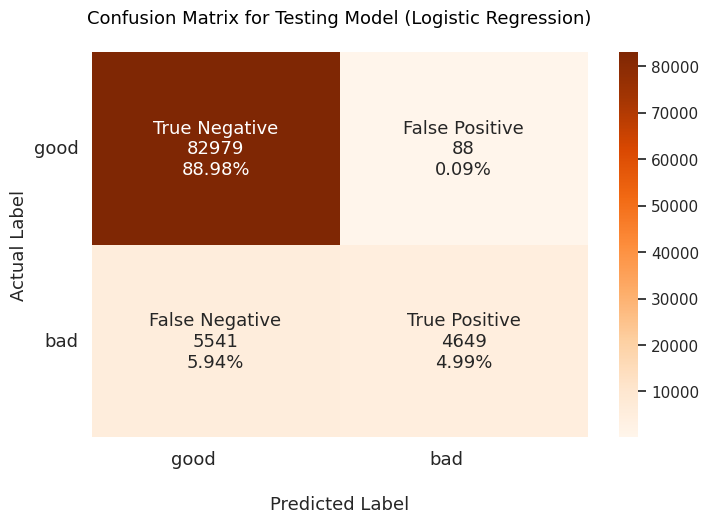

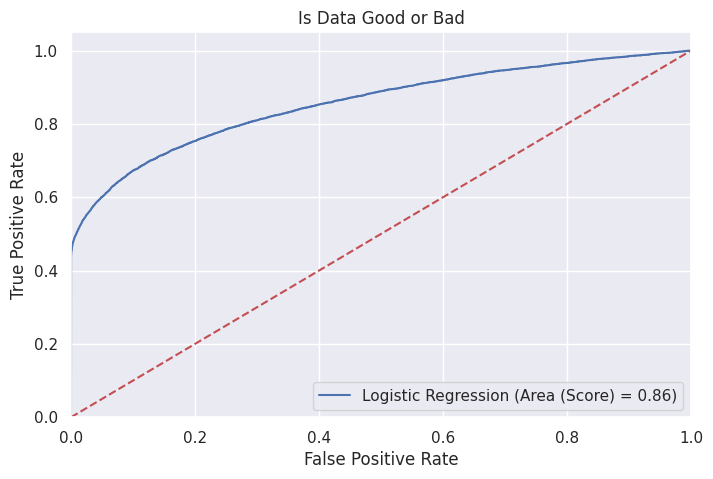

In [100]:
model_eval_test(log_model, "Logistic Regression", X_test, y_test)

In [102]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_log_train))
print("Test Accuracy: {} %".format(acc_log_test))

Training Accuracy: 93.94 %
Test Accuracy: 93.96 %


In [105]:
results_eval = pd.DataFrame({
    "Models" : train_modelname_list,
    "Precision (Train)": train_precision_list,
    "Precision (Test)": test_precision_list,
    "Recall (Train)": train_recall_list,
    "Recall (Test)": test_recall_list,
    "F1 Score (Train)" : train_f1_score_list,
    "F1 Score (Test)" : test_f1_score_list
})

results_eval.drop_duplicates(inplace = True)

results_eval.sort_values(by=["F1 Score (Test)", "Precision (Test)", "Recall (Test)"], ascending=[False, False, False]).reset_index(drop = True).style.background_gradient(cmap="Purples")

Pada contoh ini digunakan algoritma Random Forest untuk pemodelan.

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

Feature Importance dapat ditampilkan.

In [106]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values

df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

feature    importance
90                           recoveries  5.441082e-01
88                            out_prncp  1.694740e-01
89                   total_rec_late_fee  9.645265e-02
77                             int_rate  6.203190e-02
98                   mths_since_issue_d  2.520695e-02
96                             term_int  1.392238e-02
4                               grade_F  1.273099e-02
3                               grade_E  1.206631e-02
94                          tot_cur_bal  9.520644e-03
2                               grade_D  9.261181e-03
78                           annual_inc  8.192239e-03
79                                  dti  5.926341e-03
81                       inq_last_6mths  5.481933e-03
0                               grade_B  4.576407e-03
75                initial_list_status_w  3.314880e-03
10                  home_ownership_RENT  2.772379e-03
12         verification_status_Verified  2.678179e-03
23               purpose_small_business  2.606390e-03
86                           revol_util  2.444406e-03
6               home_ownership_MORTGAGE  1.805317e-03
5                               grade_G  1.055966e-03
13                  purpose_credit_card  6.621702e-04
97          mths_since_earliest_cr_line  5.343178e-04
76                            loan_amnt  4.526758e-04
1                               grade_C  4.406911e-04
85                            revol_bal  4.229996e-04
84                              pub_rec  3.982697e-04
87                            total_acc  2.899864e-04
95                       emp_length_int  2.250615e-04
21                        purpose_other  1.433071e-04
82               mths_since_last_delinq  1.120018e-04
93                         tot_coll_amt  1.031698e-04
83                             open_acc  5.751709e-05
80                          delinq_2yrs  5.228218e-05
16             purpose_home_improvement  4.502204e-05
20                       purpose_moving  3.610006e-05
18               purpose_major_purchase  3.168830e-05
34                        addr_state_FL  2.705435e-05
45                        addr_state_MD  2.487632e-05
67                        addr_state_TX  2.369631e-05
29                        addr_state_CA  2.062595e-05
36                        addr_state_HI  1.778880e-05
11  verification_status_Source Verified  1.576057e-05
54                        addr_state_NH  1.437443e-05
8                  home_ownership_OTHER  1.382964e-05
19                      purpose_medical  1.364303e-05
68                        addr_state_UT  1.316799e-05
47                        addr_state_MI  1.218128e-05
92                       acc_now_delinq  1.184950e-05
62                        addr_state_PA  1.129772e-05
32                        addr_state_DC  1.029079e-05
30                        addr_state_CO  9.647008e-06
66                        addr_state_TN  9.237959e-06
46                        addr_state_ME  8.986333e-06
25                      purpose_wedding  8.815218e-06
39                        addr_state_IL  8.707528e-06
74                        addr_state_WY  8.616400e-06
52                        addr_state_NC  7.897070e-06
58                        addr_state_NY  7.427118e-06
57                        addr_state_NV  6.402362e-06
44                        addr_state_MA  6.362268e-06
59                        addr_state_OH  4.827031e-06
73                        addr_state_WV  4.363203e-06
64                        addr_state_SC  4.325853e-06
14           purpose_debt_consolidation  3.938377e-06
28                        addr_state_AZ  3.816208e-06
17                        purpose_house  2.957318e-06
22             purpose_renewable_energy  2.629279e-06
53                        addr_state_NE  2.357465e-06
27                        addr_state_AR  2.069991e-06
15                  purpose_educational  2.004630e-06
43                        addr_state_LA  1.791493e-06
50                        addr_state_MS  1.756426e-06
72                        addr_state

### Validation

Untuk mengukur performa model, dua metrik yang umum dipakai dalam dunia credit risk adalah AUC dan KS.

In [107]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

#### AUC

In [108]:
from sklearn.metrics import roc_curve, roc_auc_score

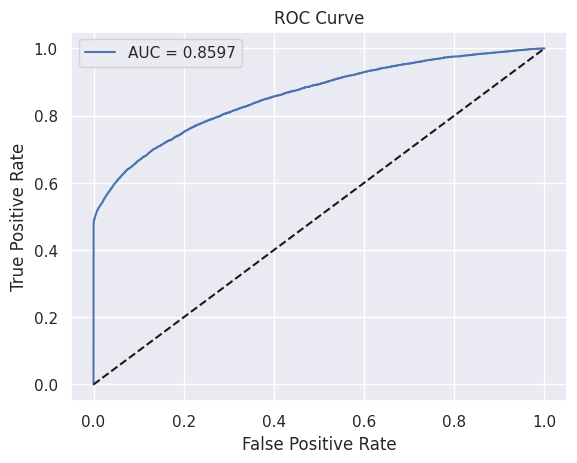

In [109]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

#### KS

In [110]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [111]:
df_actual_predicted.head()

index  y_actual  y_pred_proba  Cumulative N Population  Cumulative N Bad  \
0  321938         0      0.044132                        1                 0   
1  237177         0      0.044759                        2                 0   
2  277411         0      0.044783                        3                 0   
3  258783         0      0.044852                        4                 0   
4  291130         0      0.044934                        5                 0   

   Cumulative N Good  Cumulative Perc Population  Cumulative Perc Bad  \
0                  1                    0.000011                  0.0   
1                  2                    0.000021                  0.0   
2                  3                    0.000032                  0.0   
3                  4                    0.000043                  0.0   
4                  5                    0.000054                  0.0   

   Cumulative Perc Good  
0              0.000012  
1              0.000024  
2              0.000036  
3              0.000048  
4              0.000060

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5673')

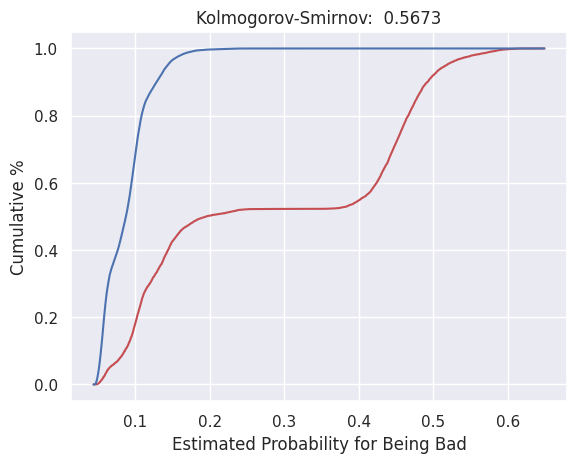

In [112]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Model yang dibangun menghasilkan performa `AUC = 0.857` dan `KS = 0.56`. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.